In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df=pd.read_csv('../Notes_notebbok/DATA/rock_density_xray.csv')

In [113]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [114]:
df.columns=['Signal','Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

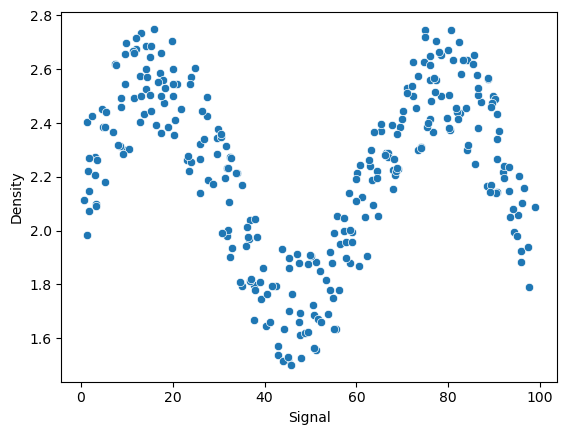

In [115]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [116]:
df.head()

Signal   Density
0  72.945124  2.456548
1  14.229877  2.601719
2  36.597334  1.967004
3   9.578899  2.300439
4  21.765897  2.452374

In [117]:
X=df['Signal'].values.reshape(-1,1)
y=df['Density']

In [118]:
X

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708],
       [89.64797256],
       [69.49273293],
       [20.15052036],
       [82.25633703],
       [64.42480217],
       [38.42706534],
       [ 9.89157994],
       [31.7410984 ],
       [90.4960676 ],
       [13.19342555],
       [ 9.55665673],
       [26.00550577],
       [24.81782725],
       [40.29631043],
       [29.60926638],
       [76.57740035],
       [82.61598742],
       [ 1.66229161],
       [17.32519267],
       [35.05157441],
       [63.47748521],
       [13.68823691],
       [17.49779896],
       [ 1.86382485],
       [17.96684624],
       [23.9388581 ],
       [66.36433682],
       [34.02717884],
       [76.03302052],
       [82.66759709],
       [66.78076834],
       [47.4528517 ],
       [74.02752794],
       [86.20473574],
       [72.24767039],
       [80.33899095],
       [36.86719496],
       [31.92883259],
       [85.68535822],
       [78.45459768],
       [19

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr_model=LinearRegression()

In [123]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [124]:
lr_preds=lr_model.predict(X_test)

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [126]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [127]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

<AxesSubplot:xlabel='Signal', ylabel='Density'>

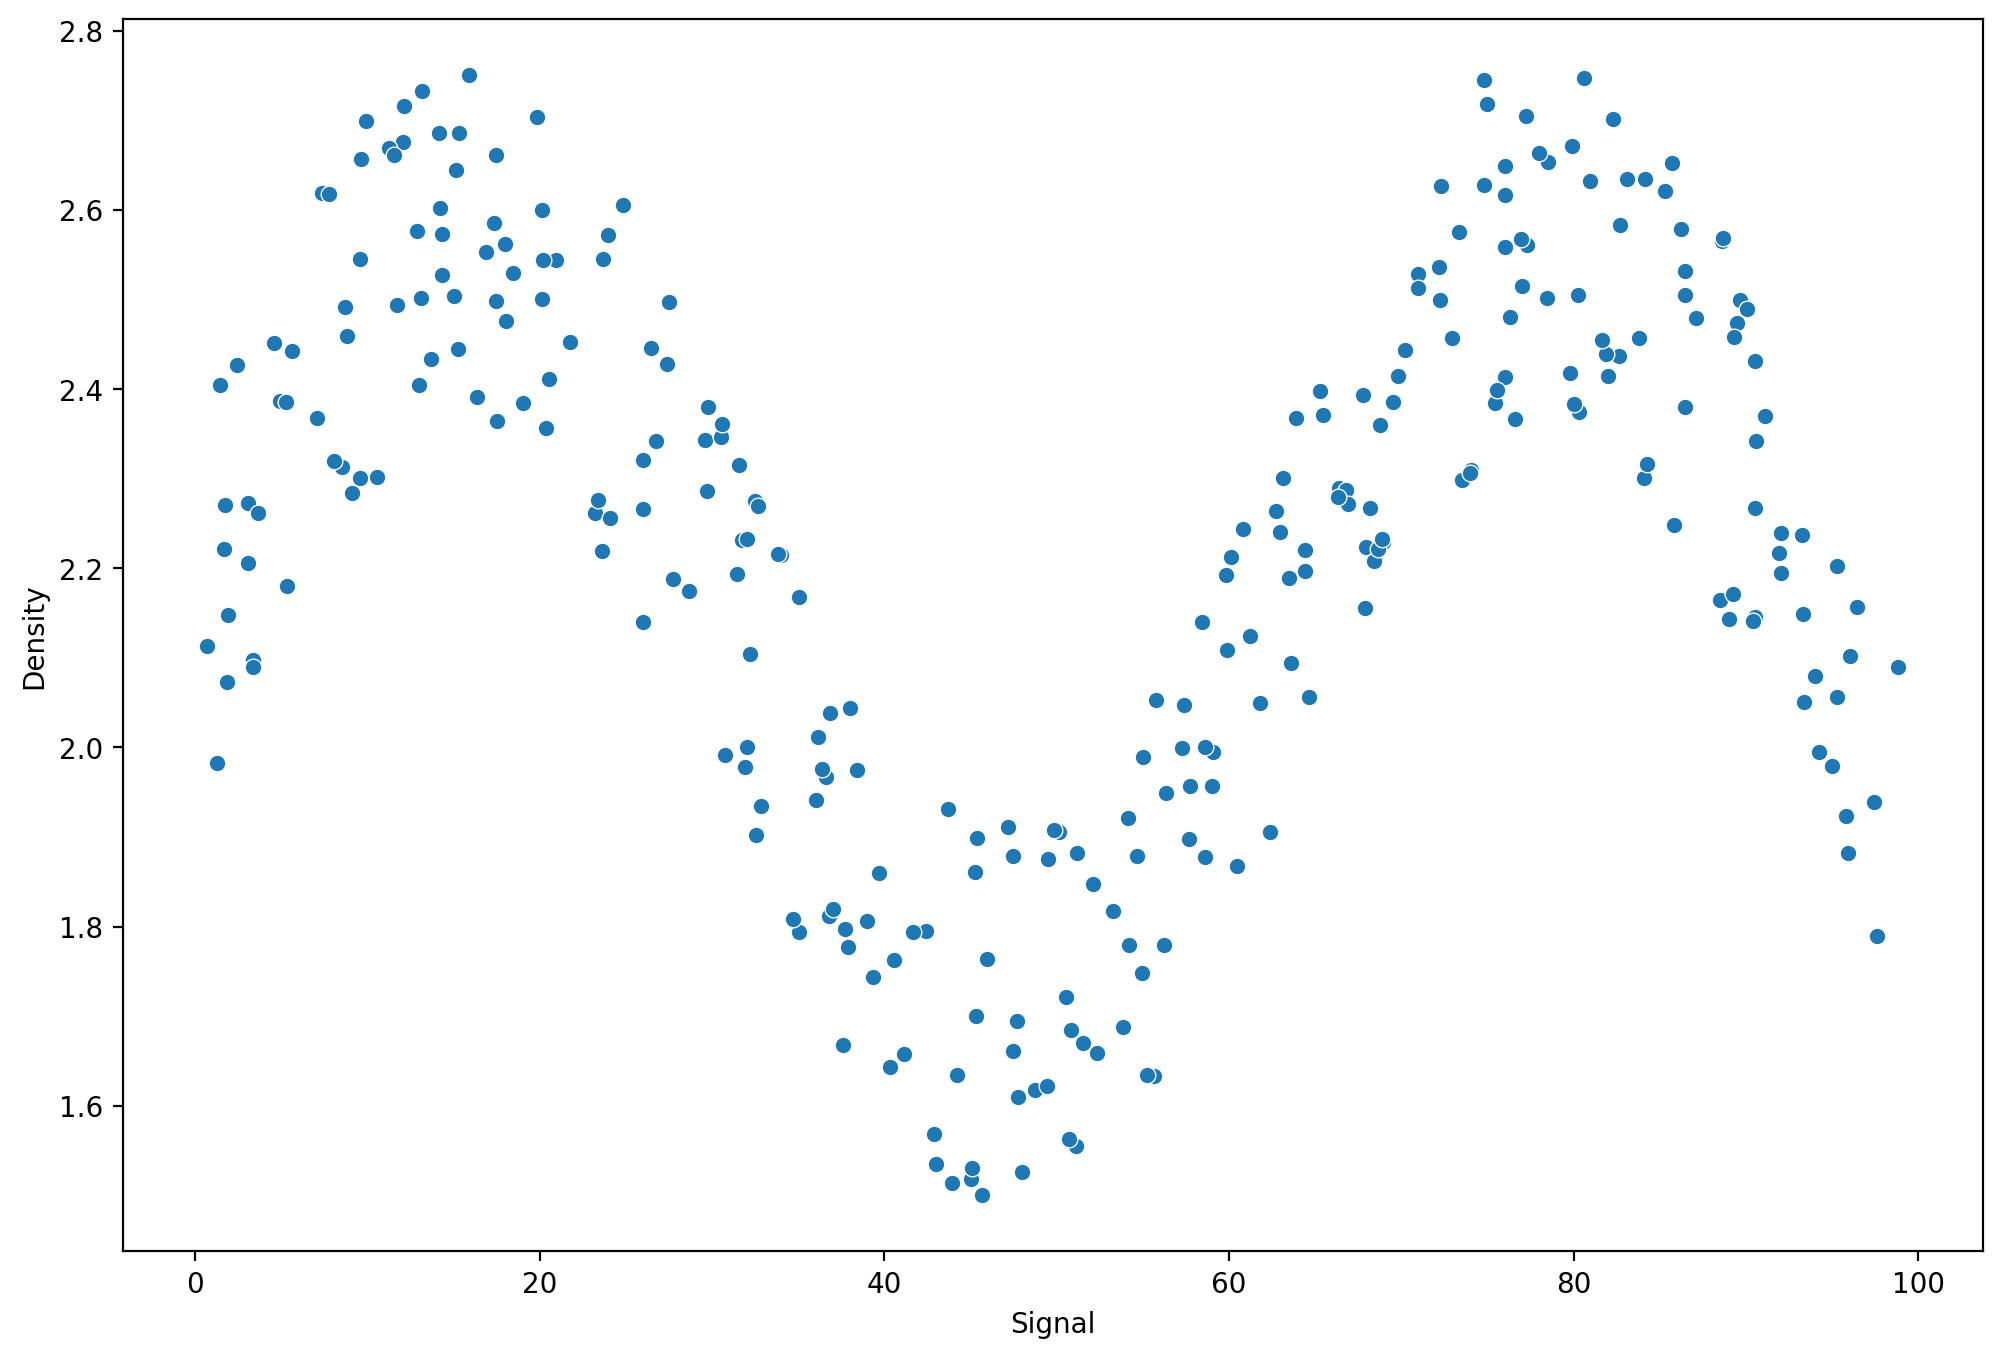

In [128]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [129]:
signal_range=np.arange(0,100)

In [130]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [131]:
signal_preds=lr_model.predict(signal_range.reshape(-1,1))

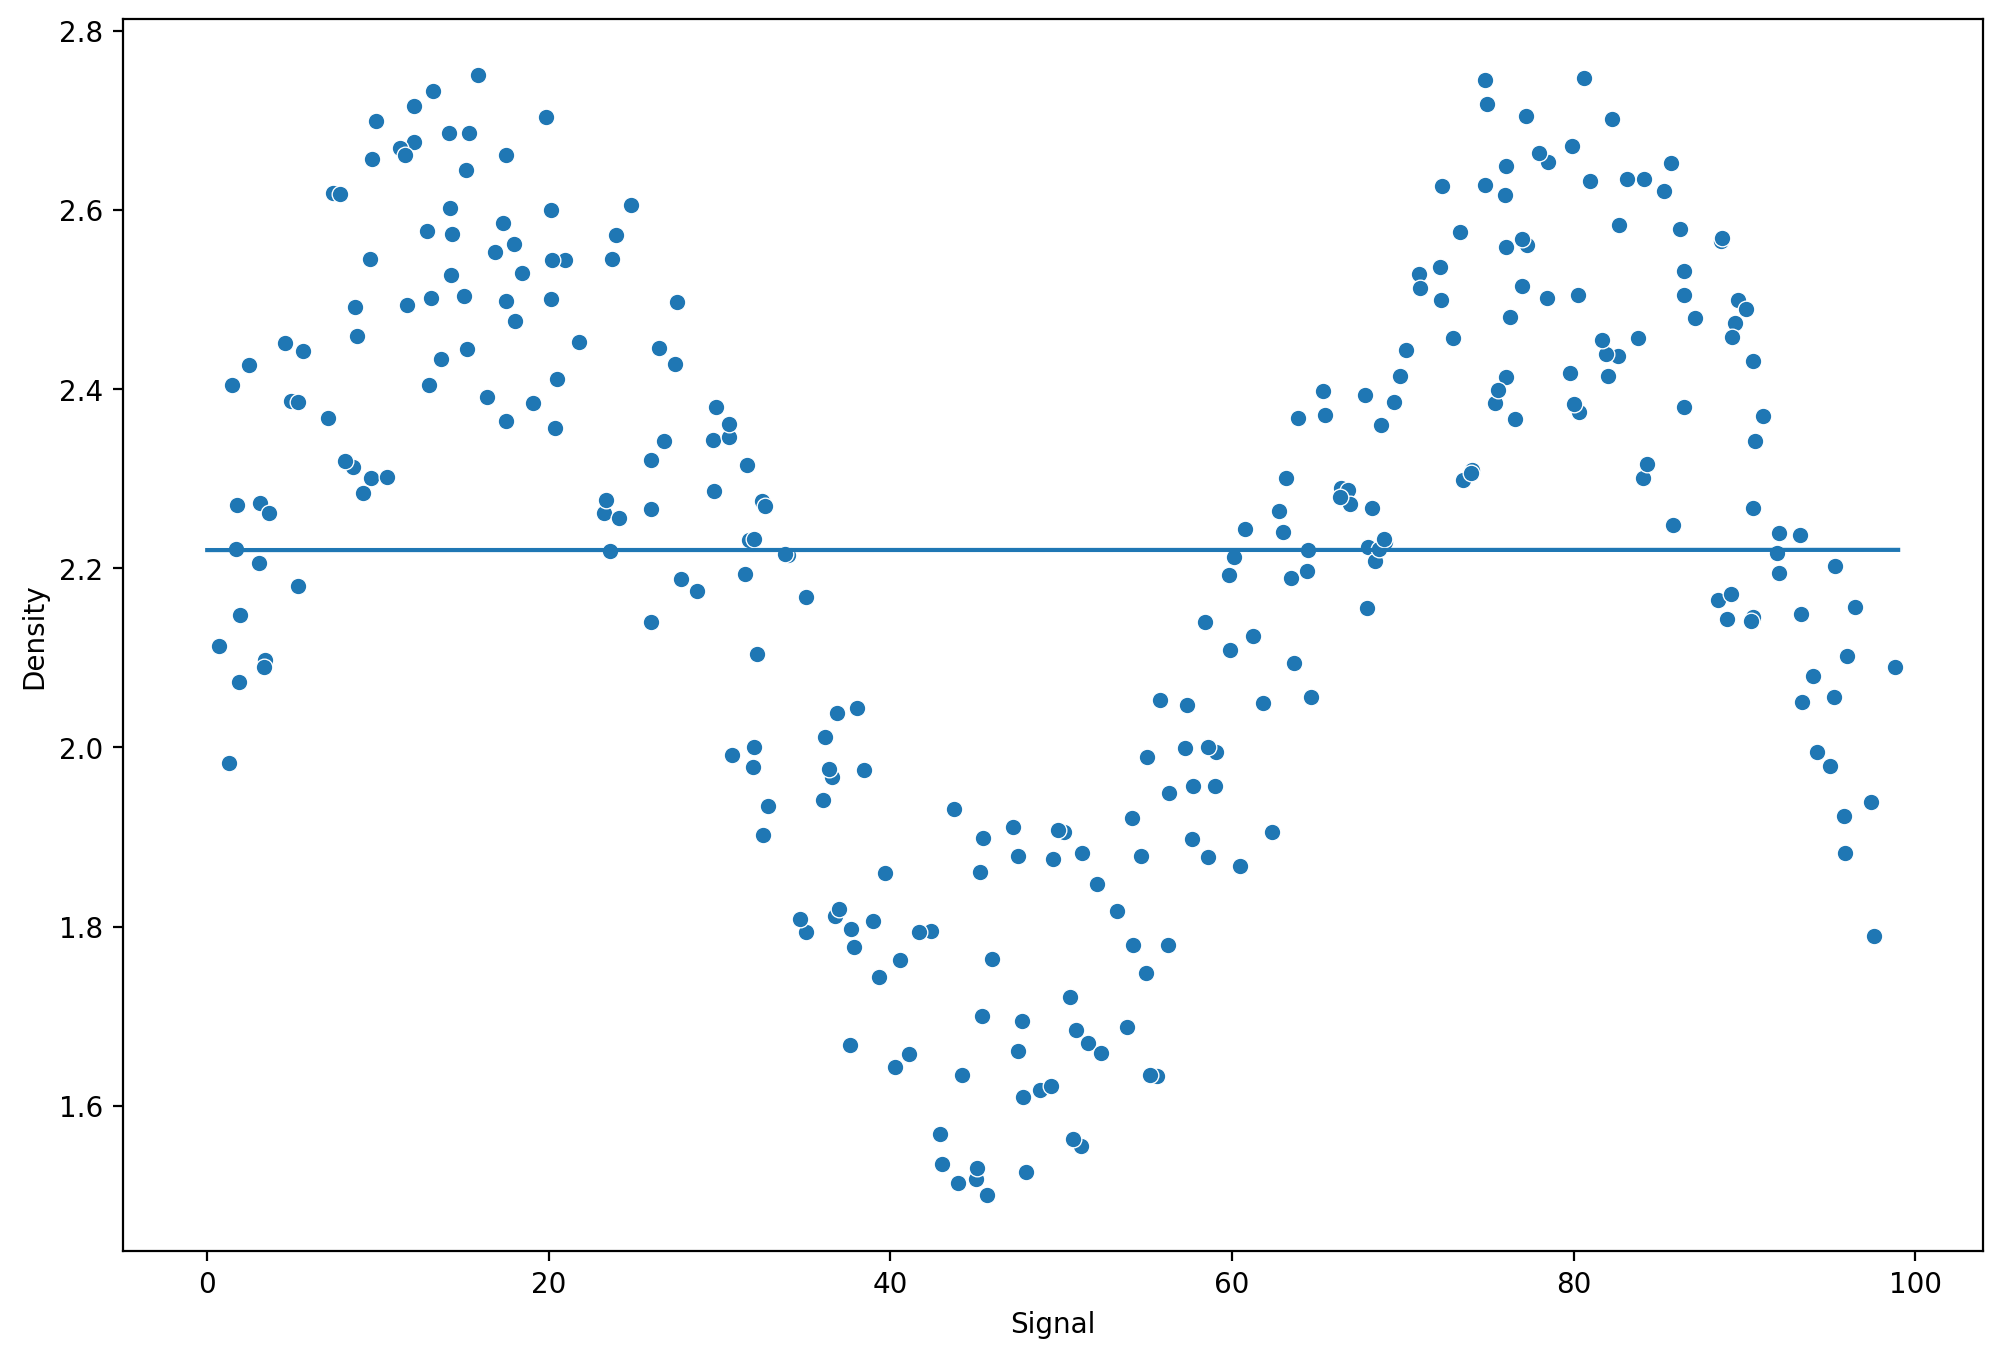

In [132]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_preds)

In [133]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    #FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    #GET METRICS
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    
    #PLOT RESULTS MODEL SIGNAL RANGE
    signal_range=np.arange(0,100)
    signal_preds=model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    
    plt.plot(signal_range,signal_preds)

MAE:0.211198973318633
RMSE:0.2570051996584629


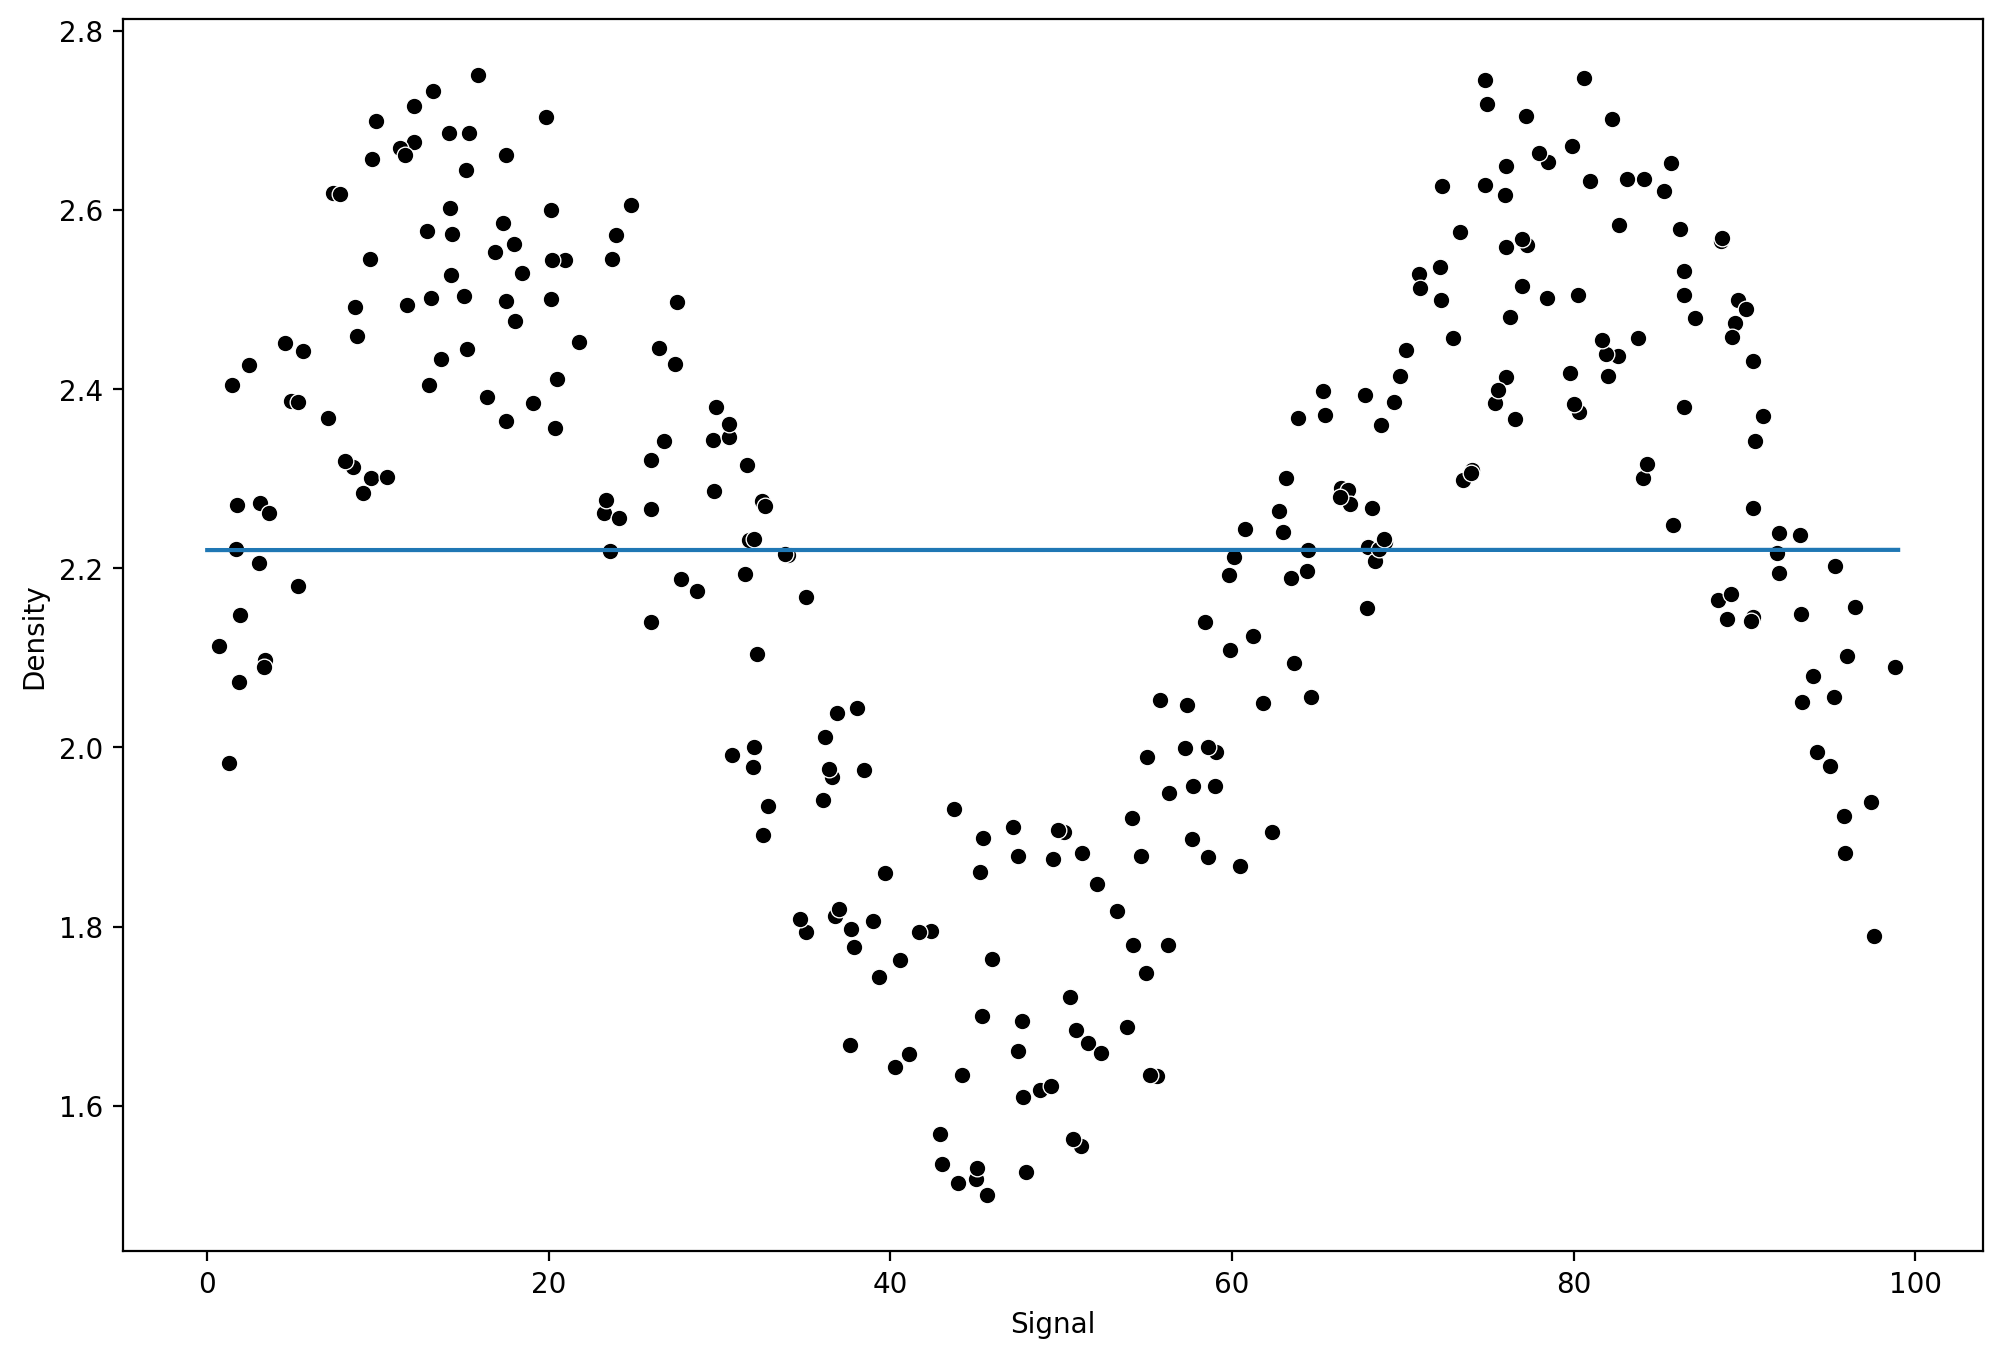

In [134]:
model=LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [136]:
pipe=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE:0.11969085253552043
RMSE:0.13807383449323551


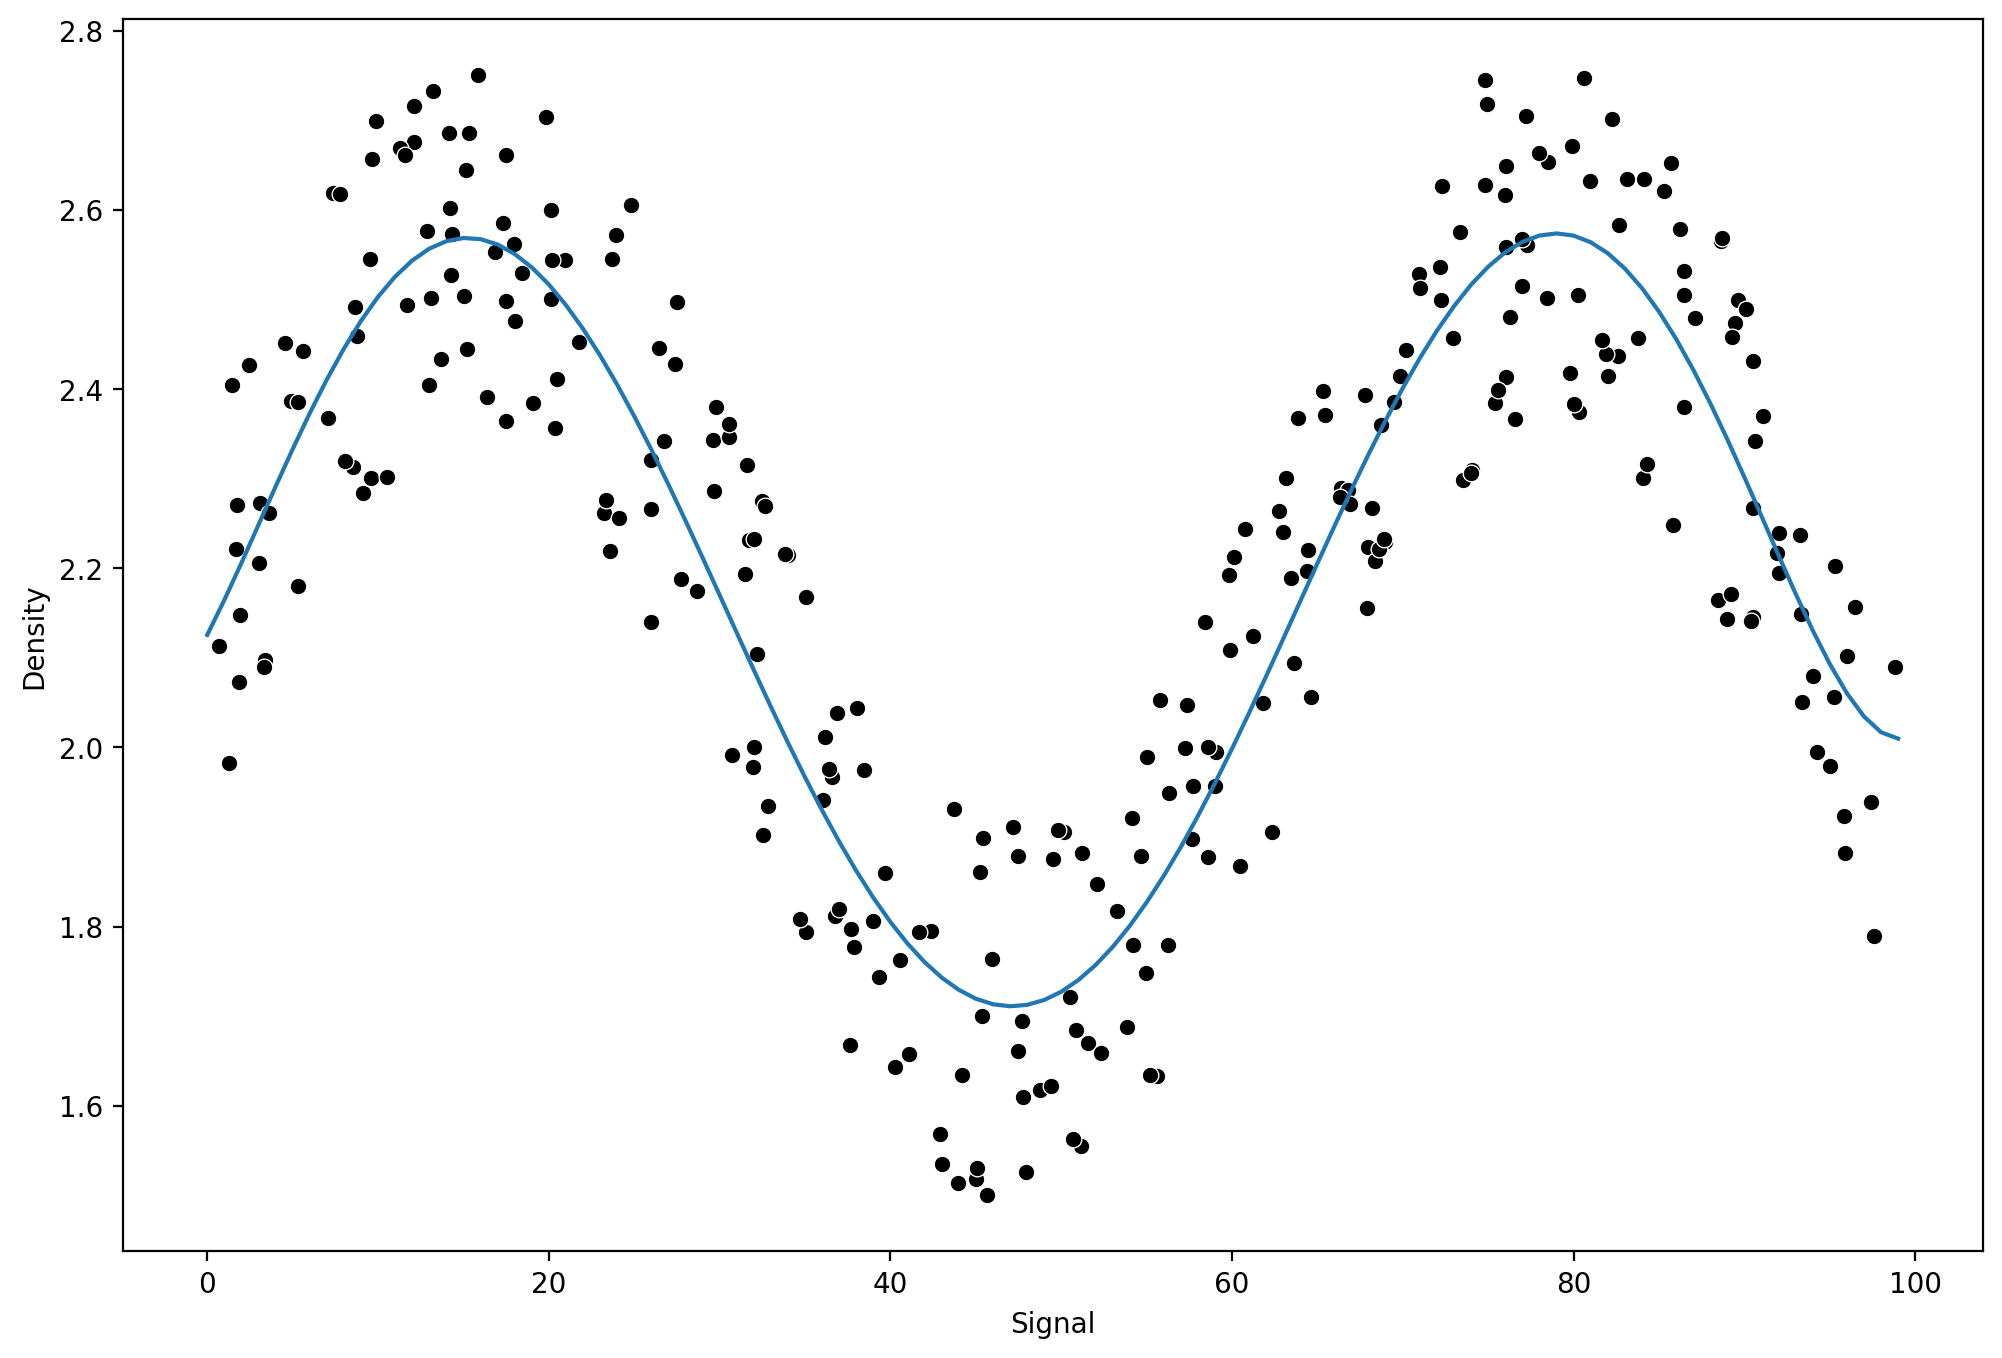

In [137]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [138]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926
MAE:0.13363165935705318
RMSE:0.15954234753677107


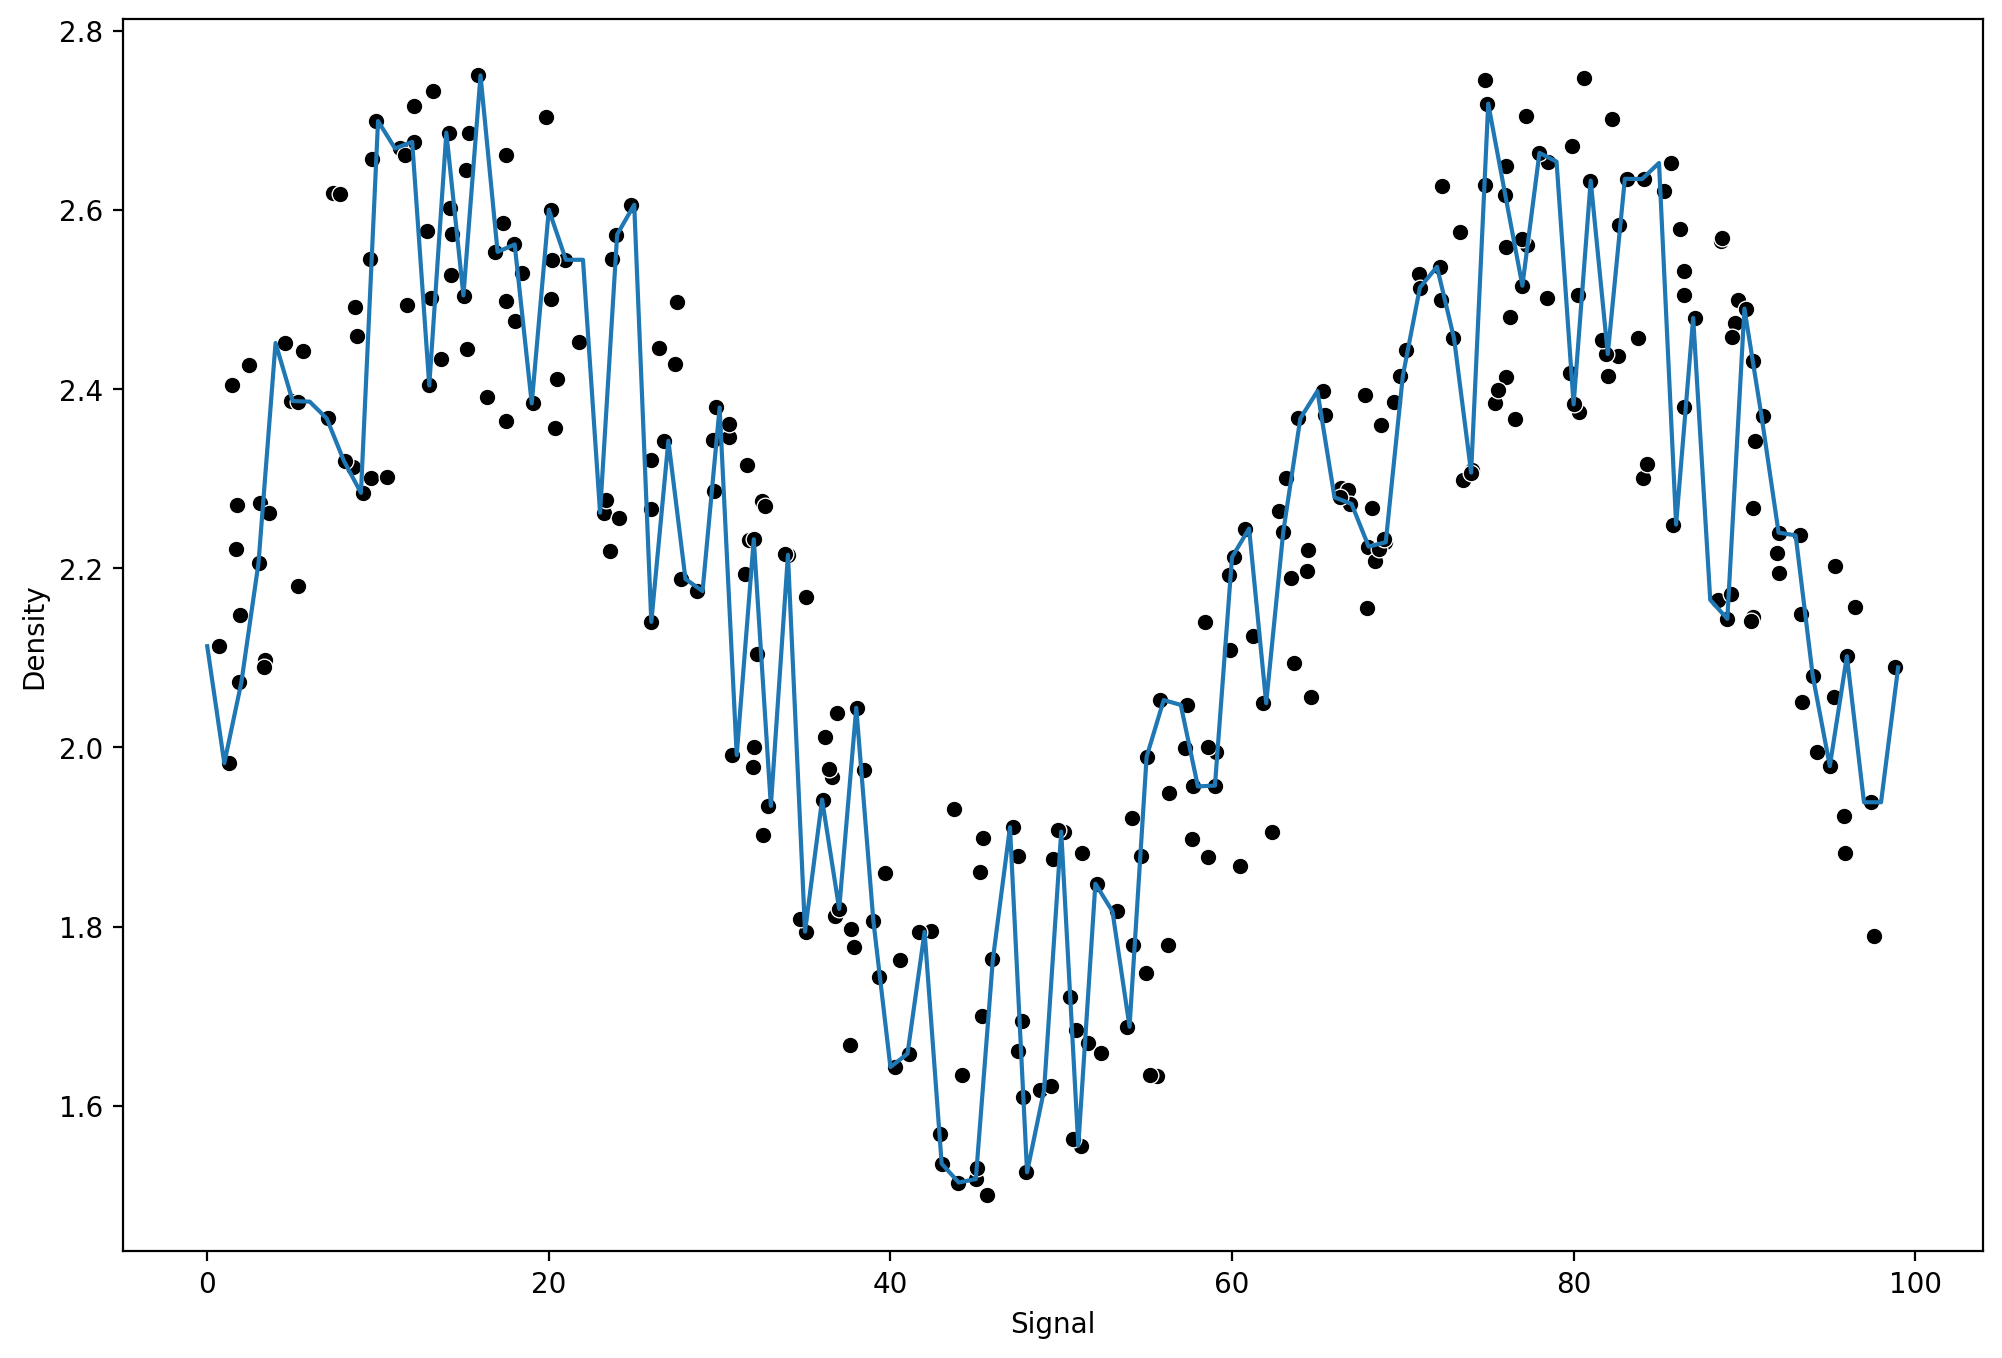

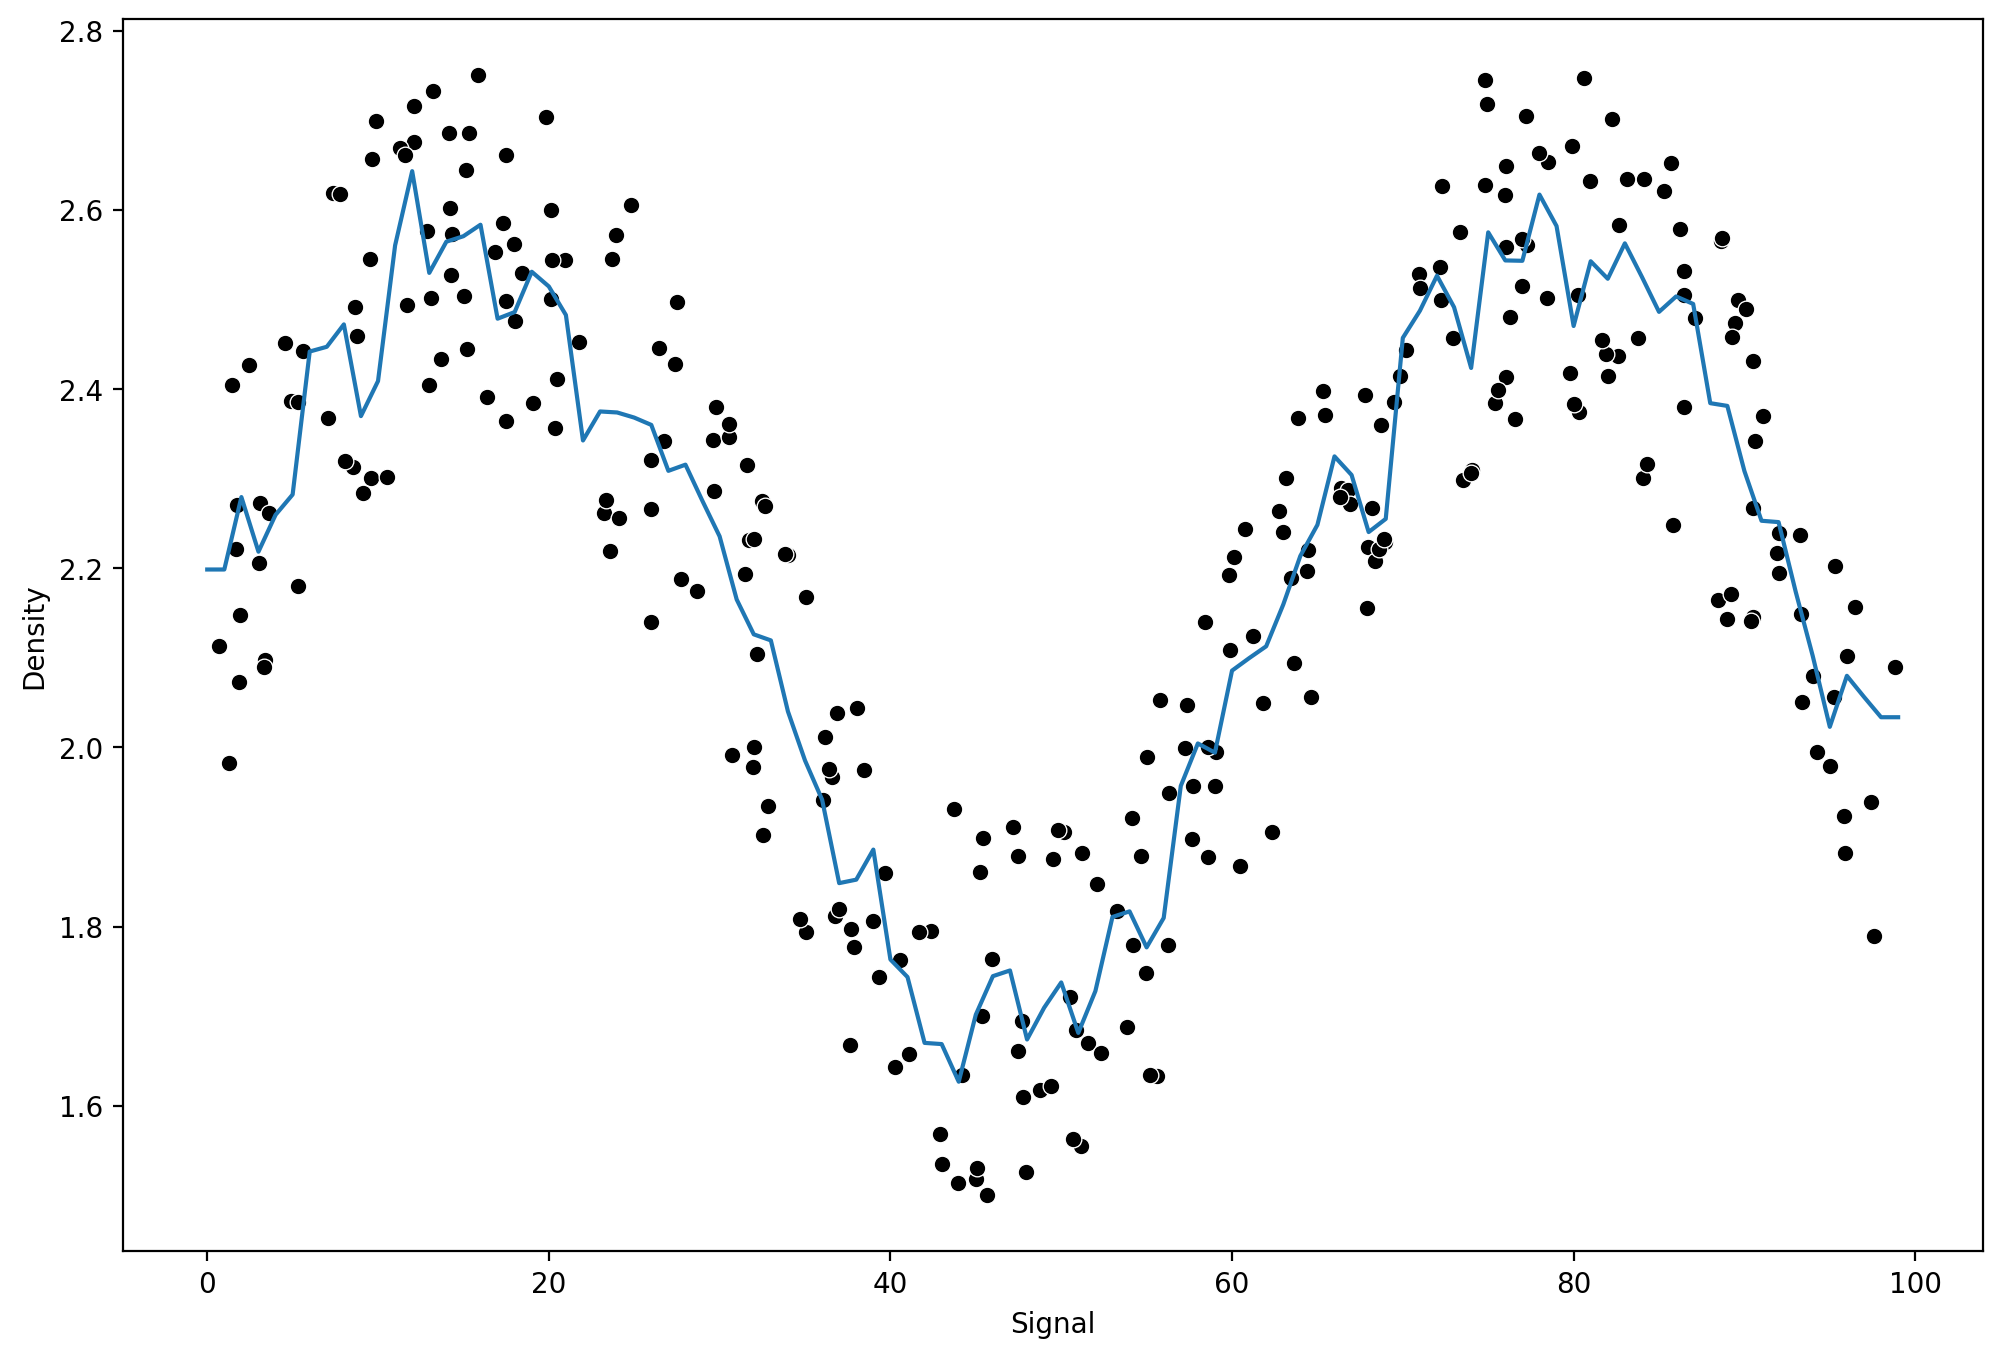

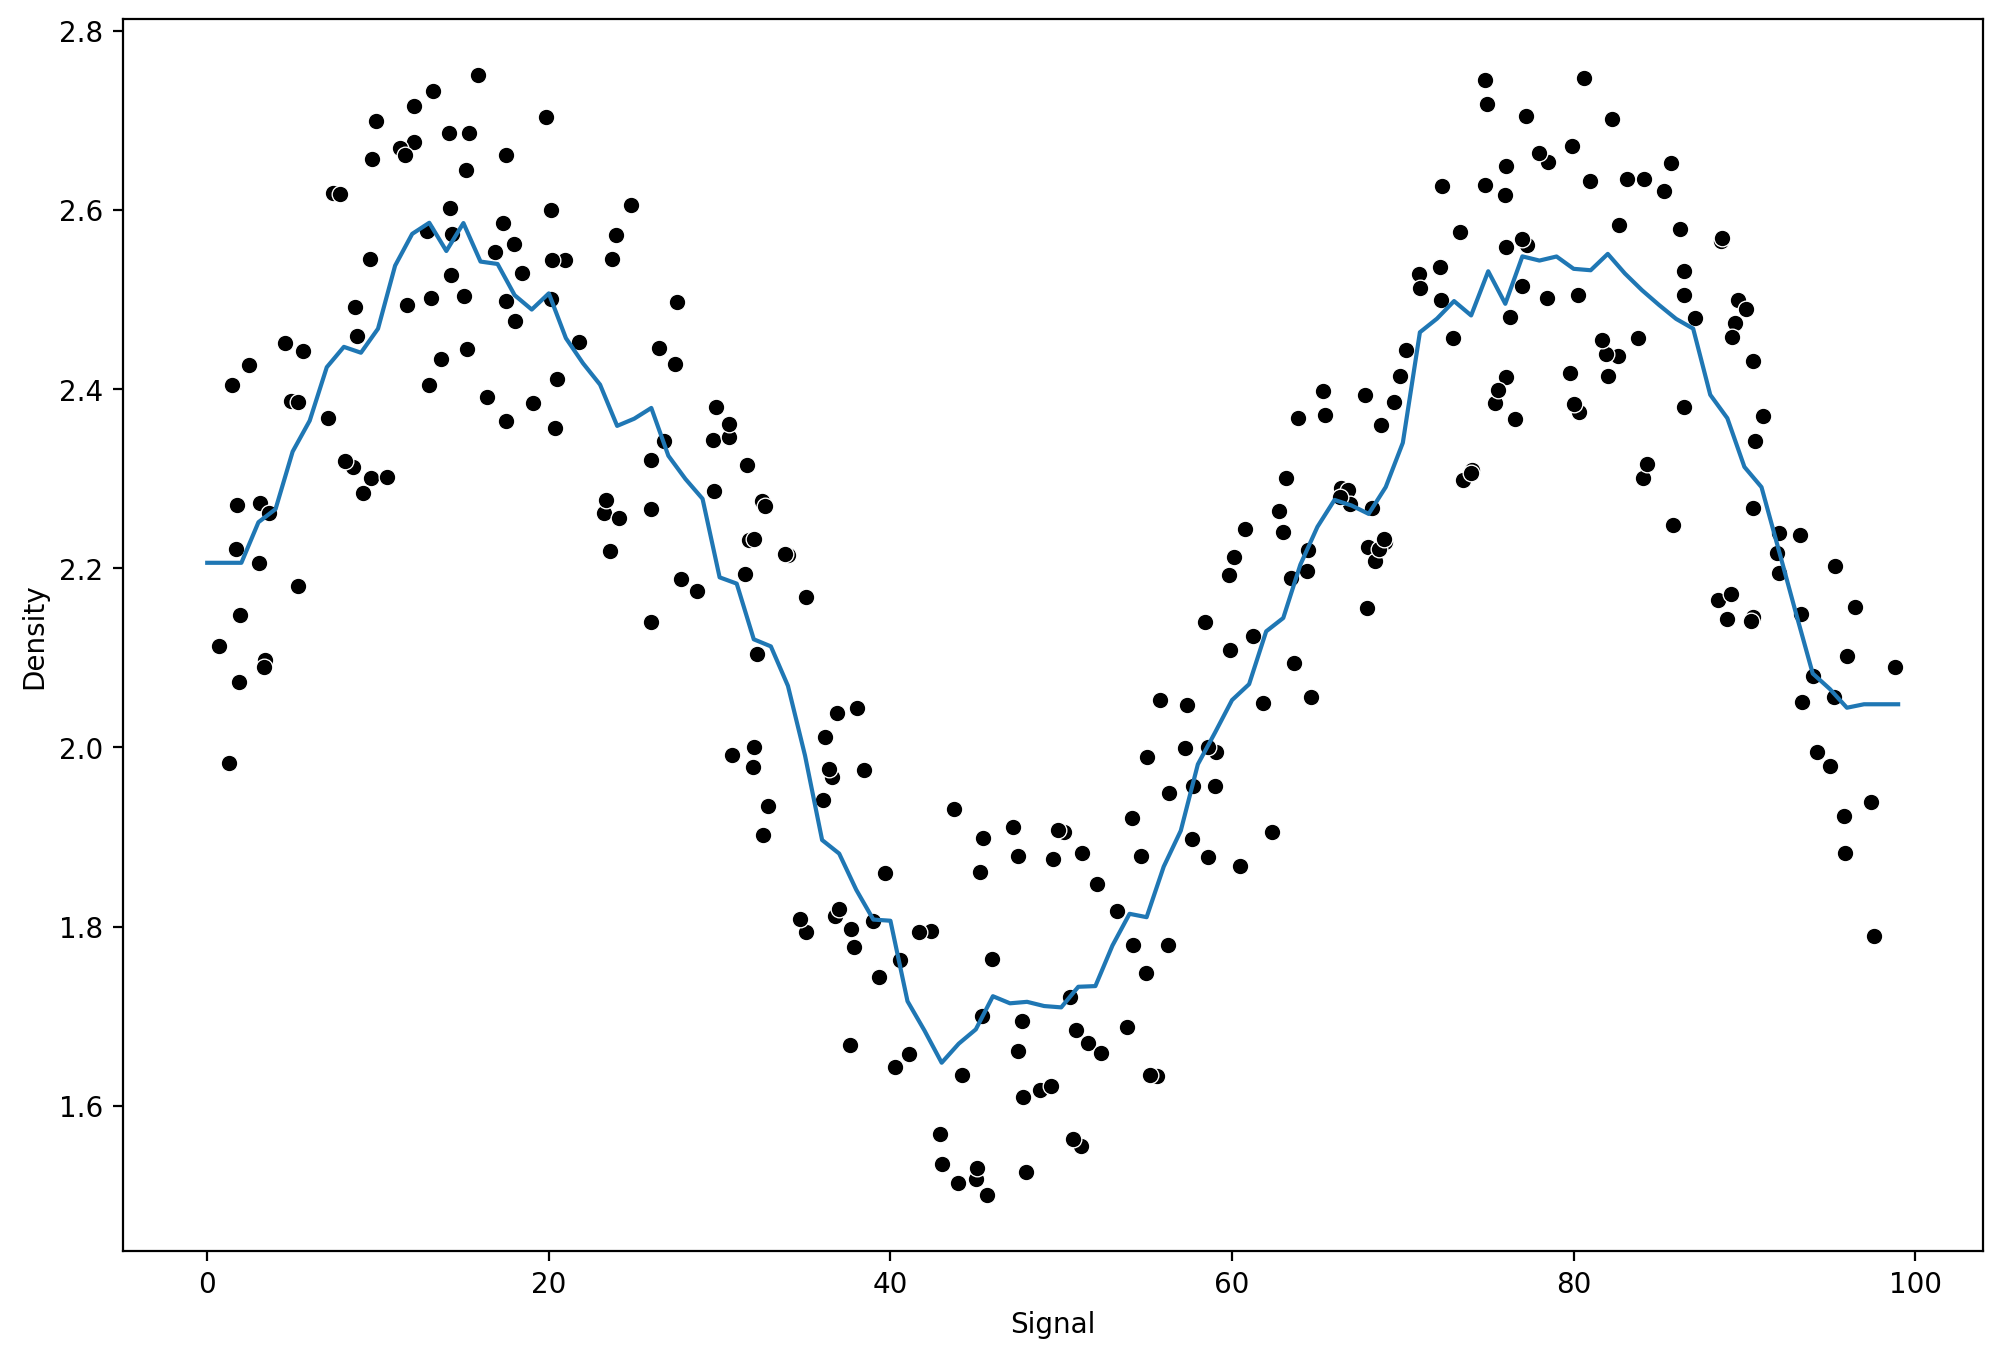

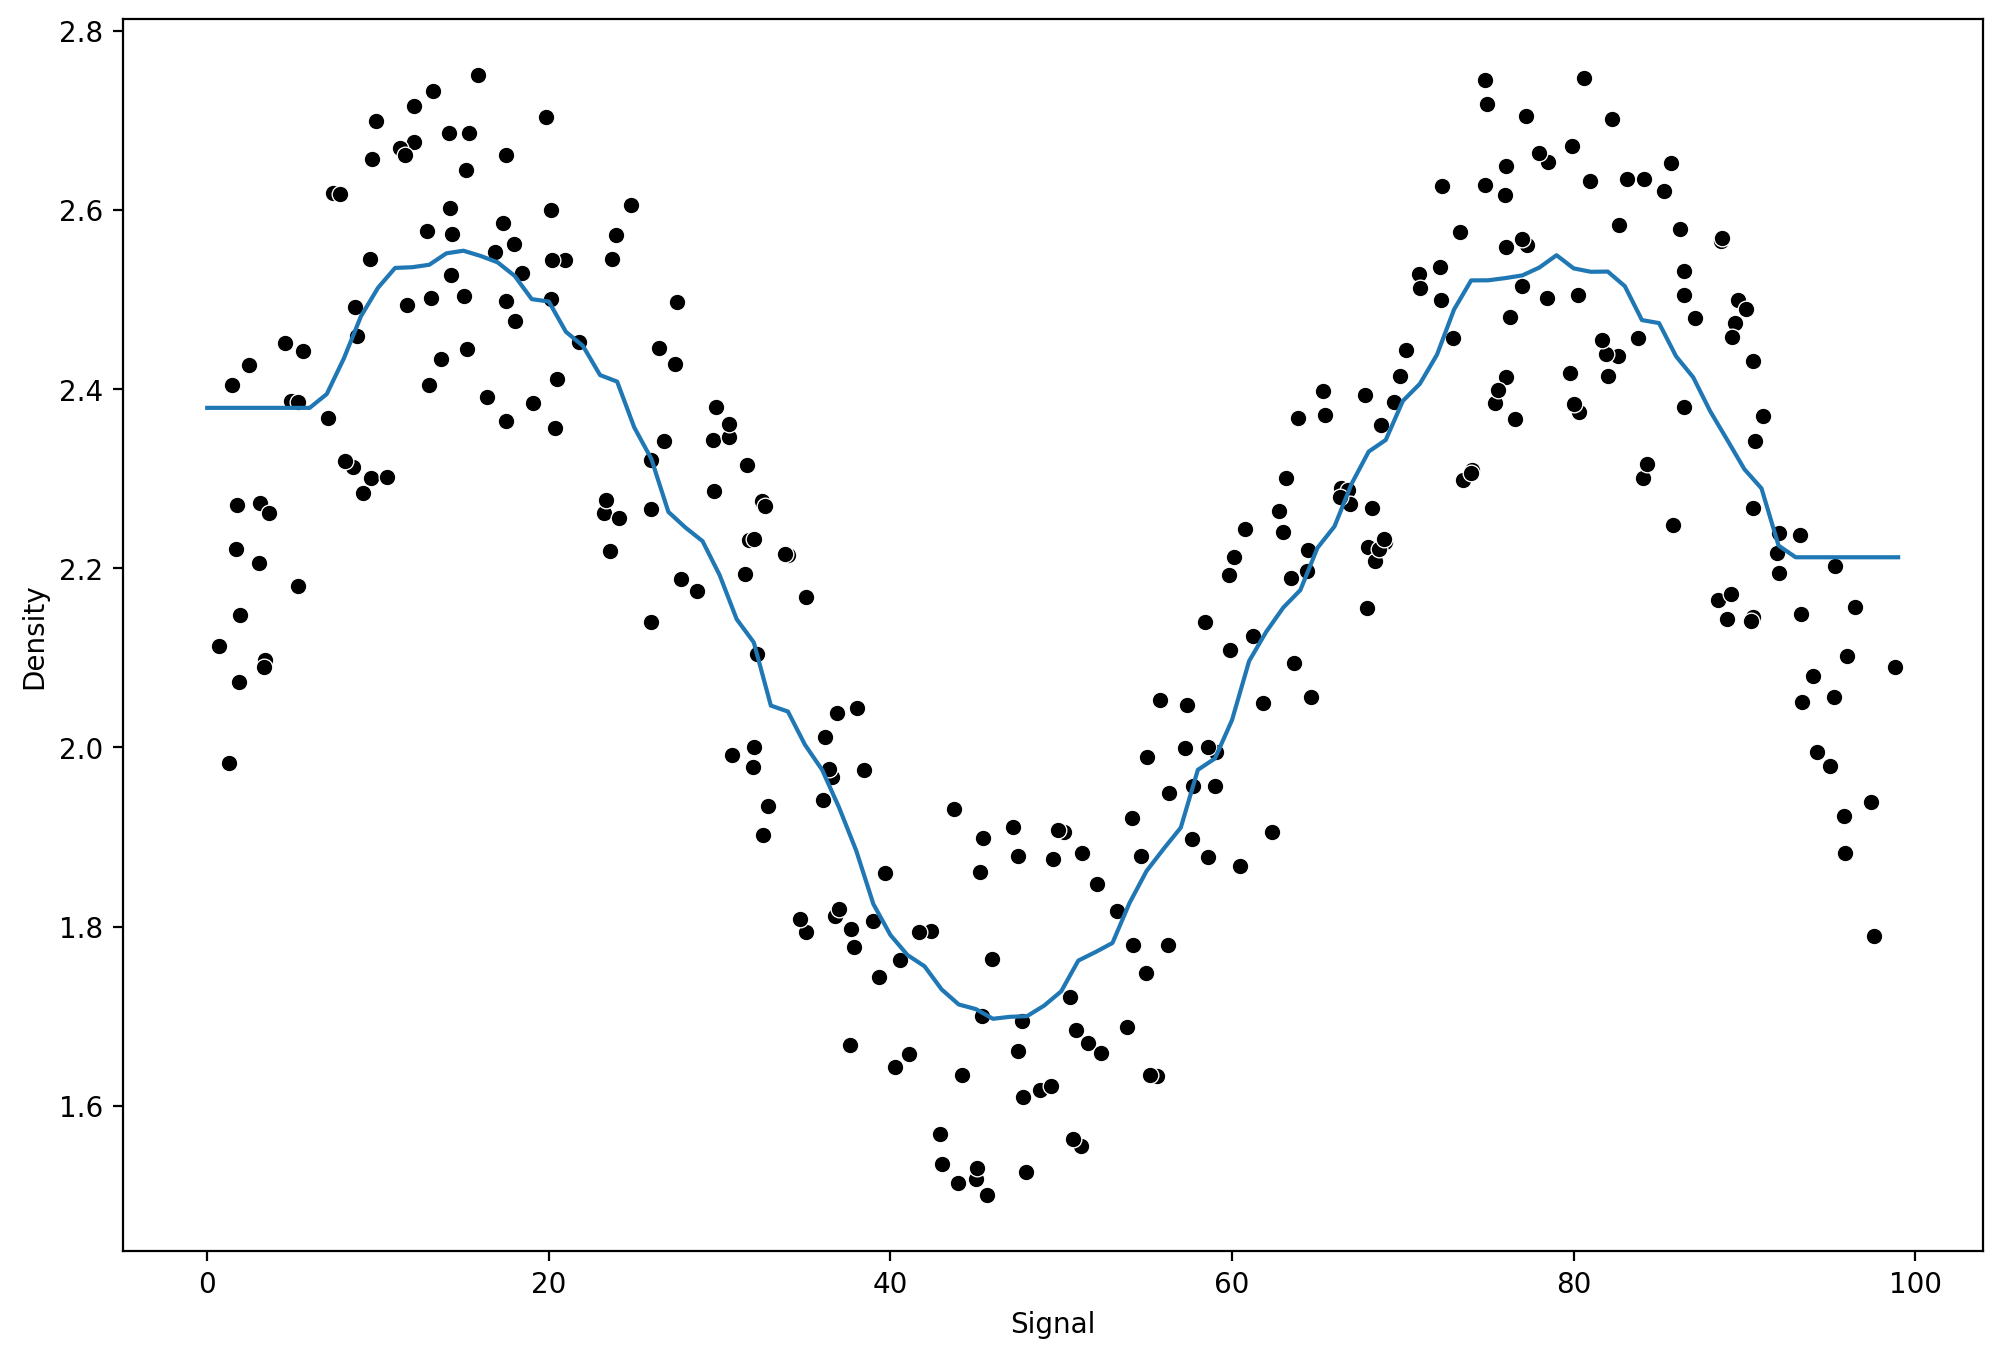

In [139]:
k_values=[1,5,10,30]

for n in k_values:
    
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [140]:
from sklearn.tree import DecisionTreeRegressor

MAE:0.11877297474442378
RMSE:0.1523487028635337


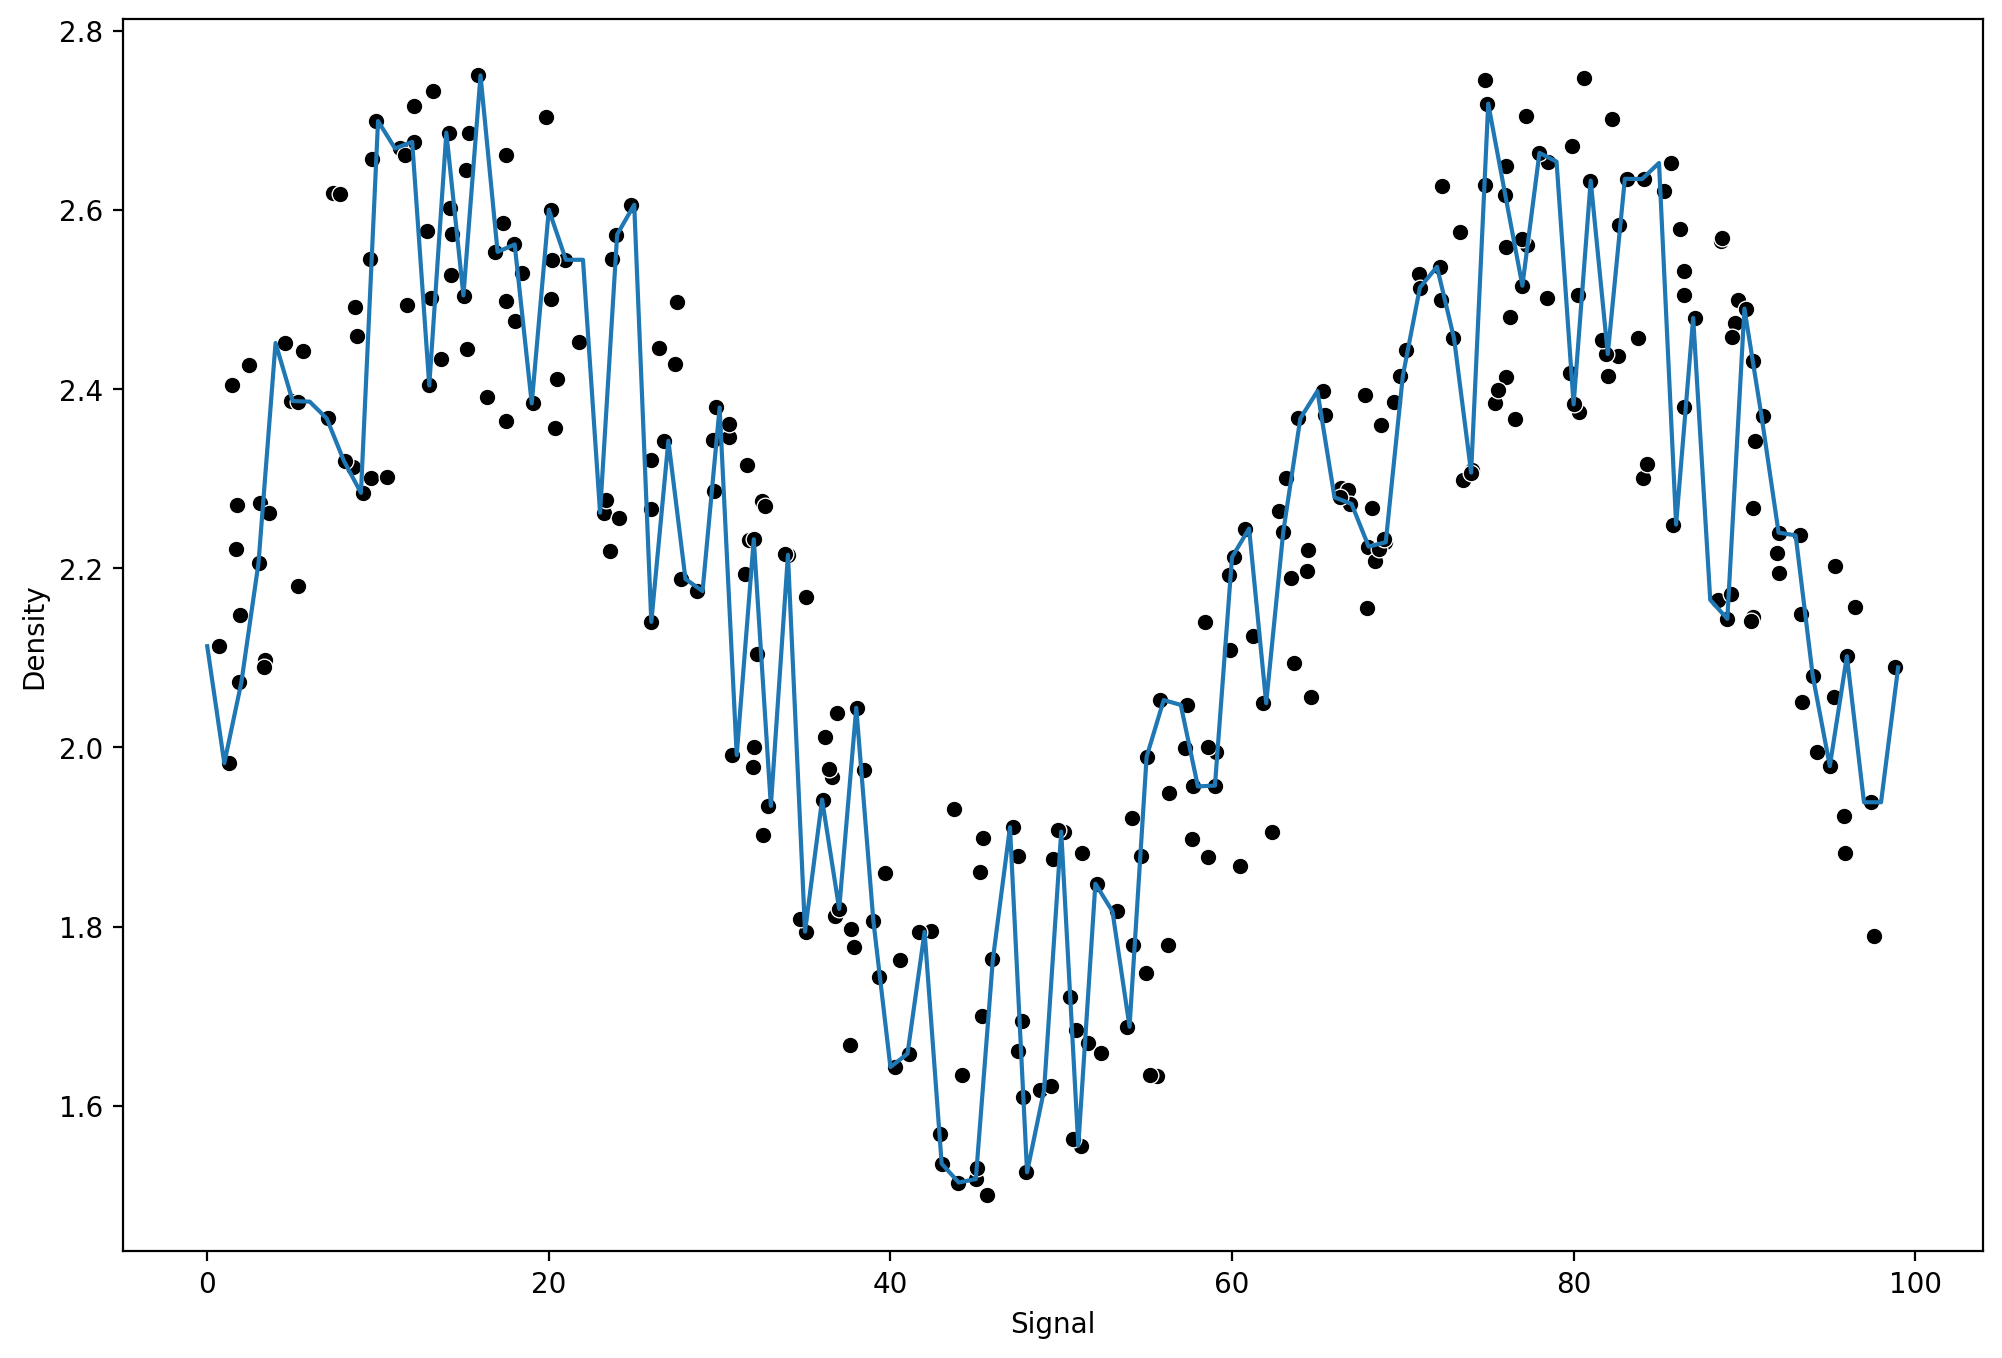

In [141]:
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [145]:
from sklearn.svm import SVR

In [146]:
from sklearn.model_selection import GridSearchCV

In [154]:
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],
            'gamma':[0,0.1,0.3,0.7,1,2,5,10,15,'auto','scale']}
grid=GridSearchCV(svr,param_grid)

MAE:0.10854210121348368
RMSE:0.12646999302046696


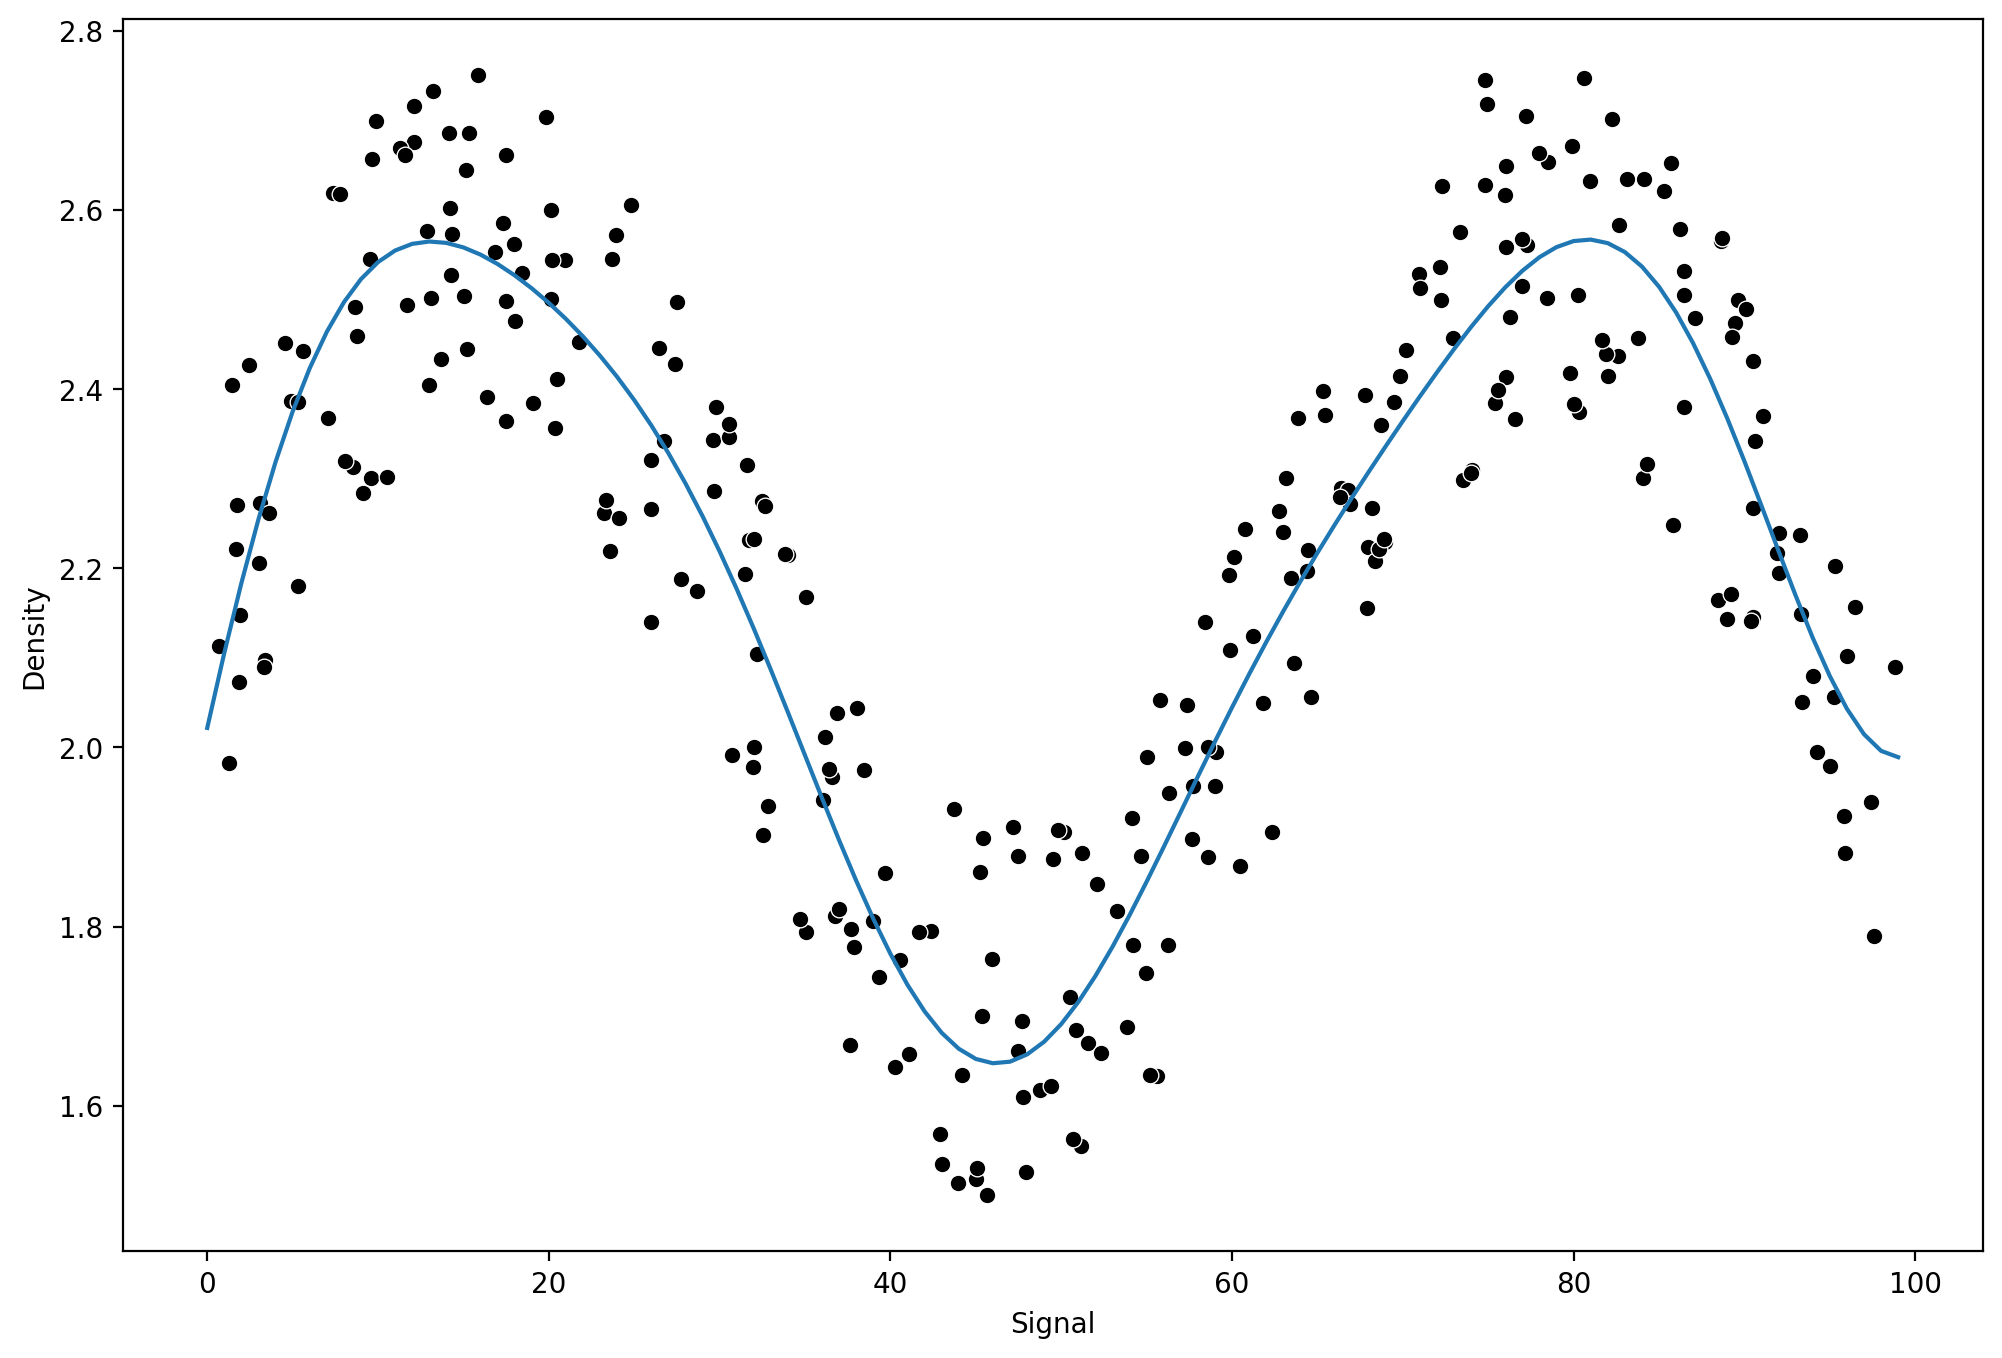

In [155]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:0.1190588957328914
RMSE:0.1379902677642552
MAE:0.11967551233253731
RMSE:0.13835646518636333
MAE:0.13492250899723116
RMSE:0.15056897549662485
MAE:0.13332054768498286
RMSE:0.15171544889266905
MAE:0.13592646383256912
RMSE:0.15743482593738492
MAE:0.14819395654865597
RMSE:0.16834820730410255
MAE:0.15576580136146165
RMSE:0.17991992283970146
MAE:0.16675402955444846
RMSE:0.1964233742440134
MAE:0.13332054768498286
RMSE:0.15171544889266905
MAE:0.12017510123813938
RMSE:0.13498358709618385


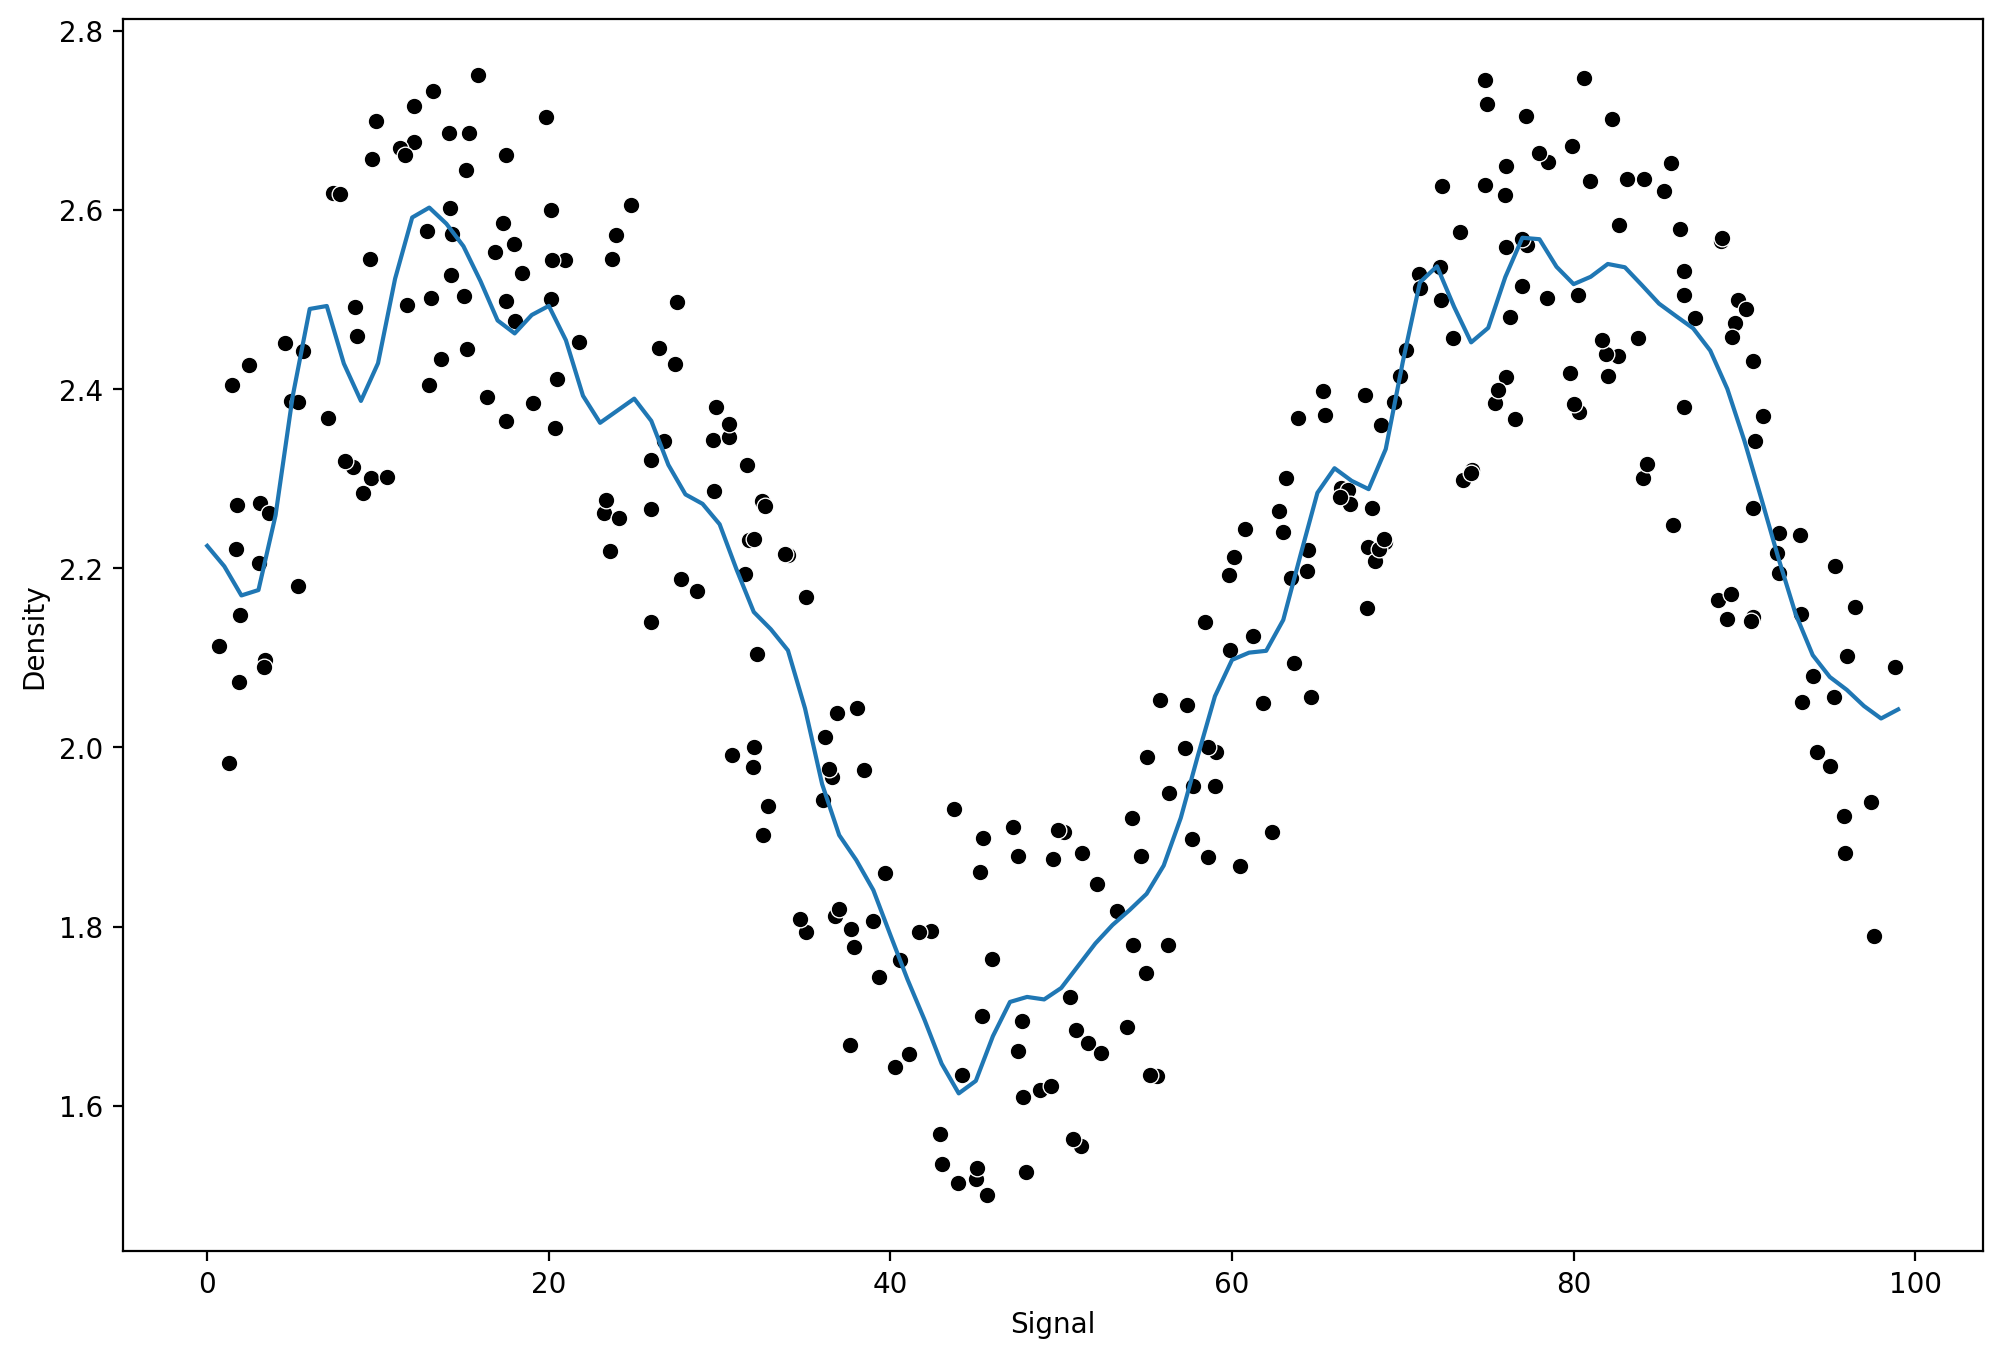

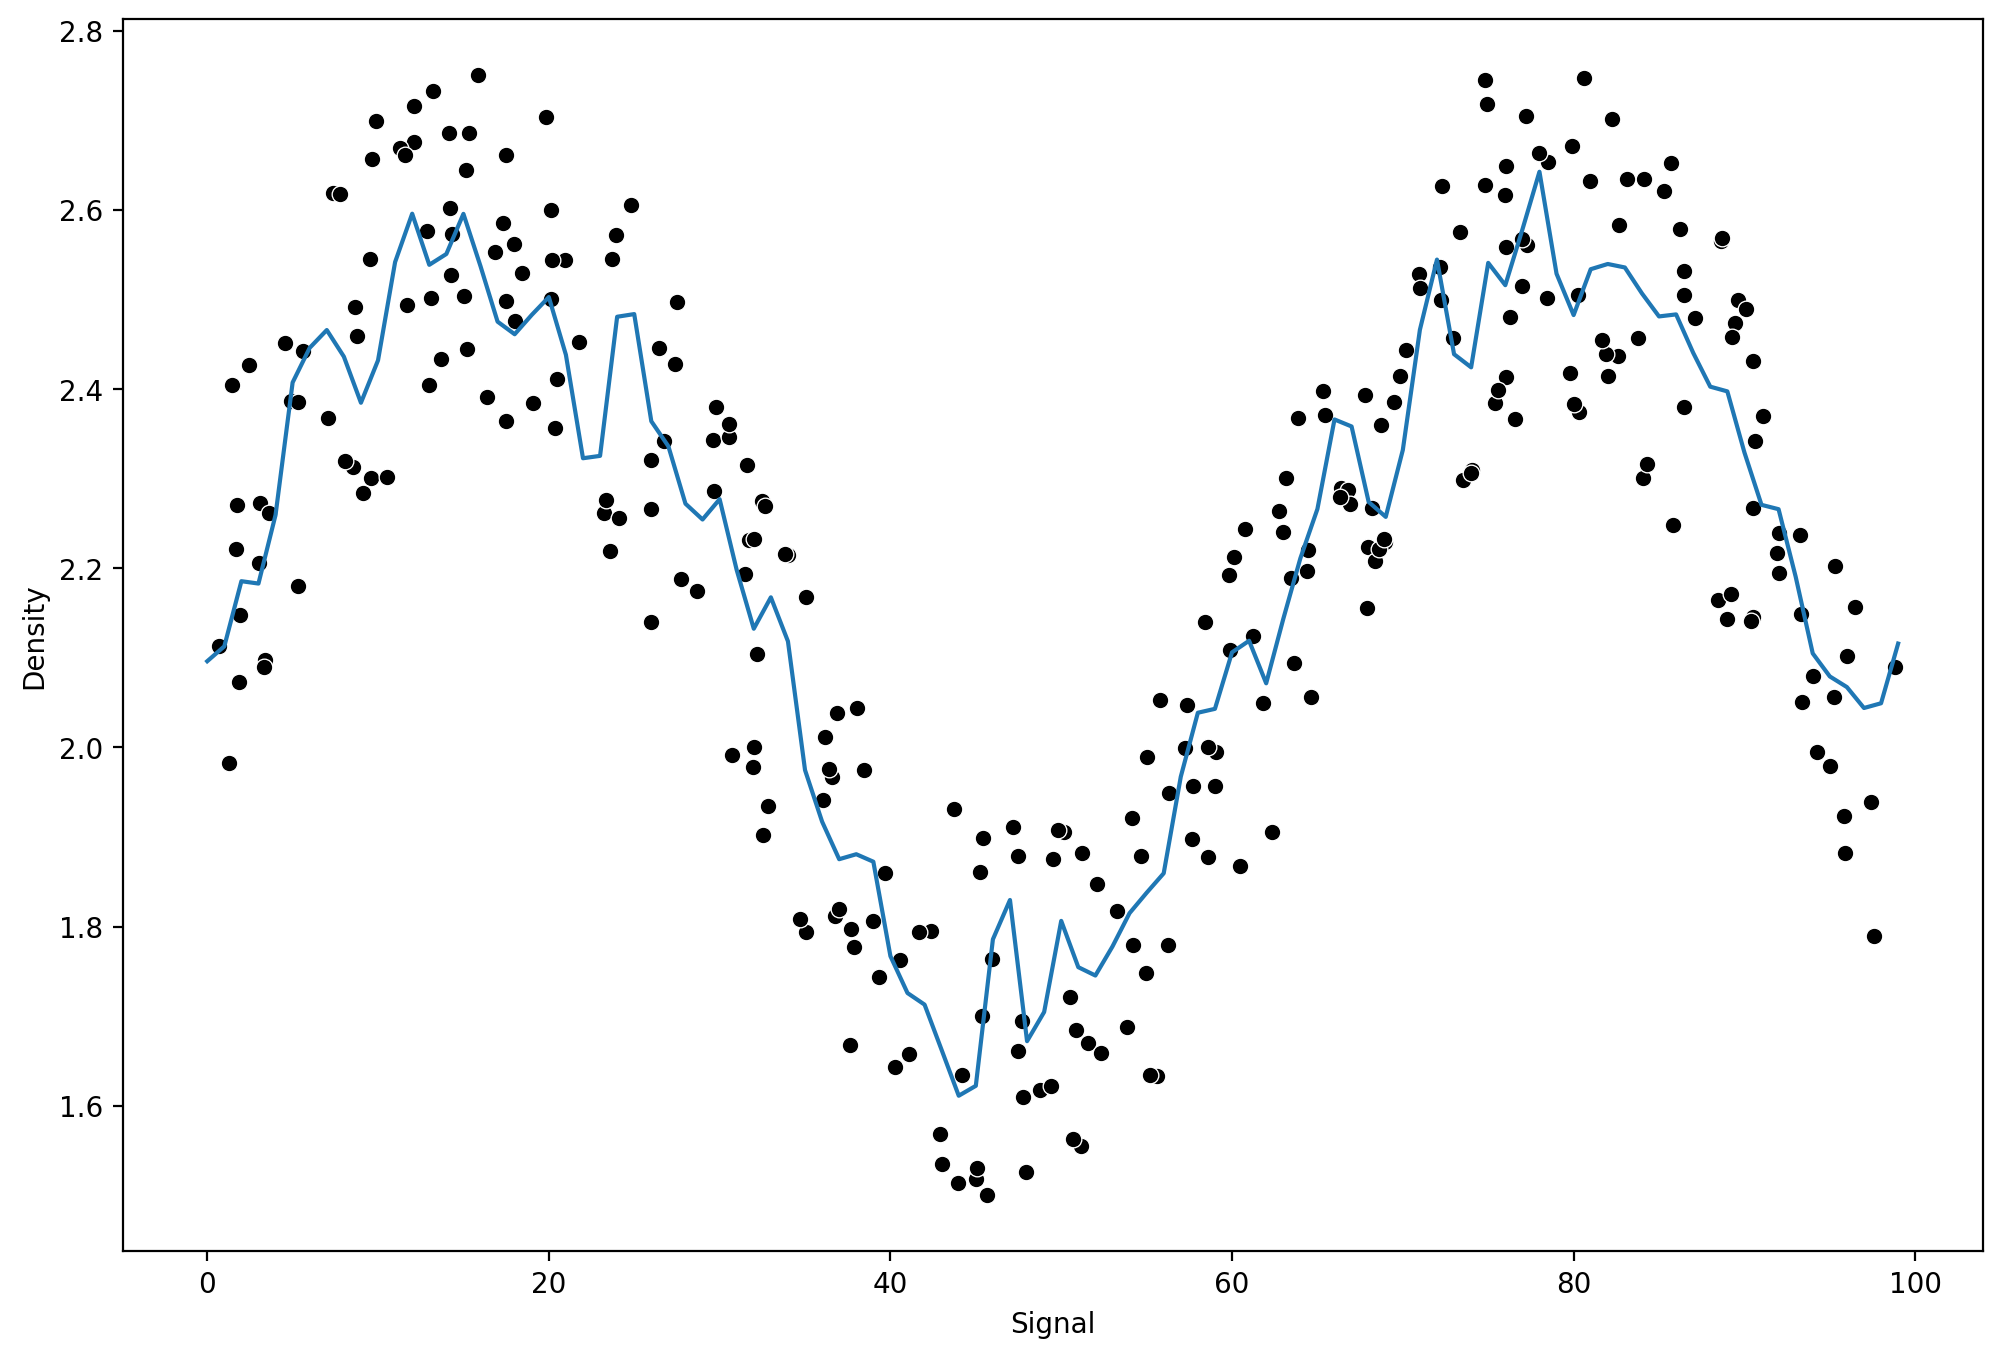

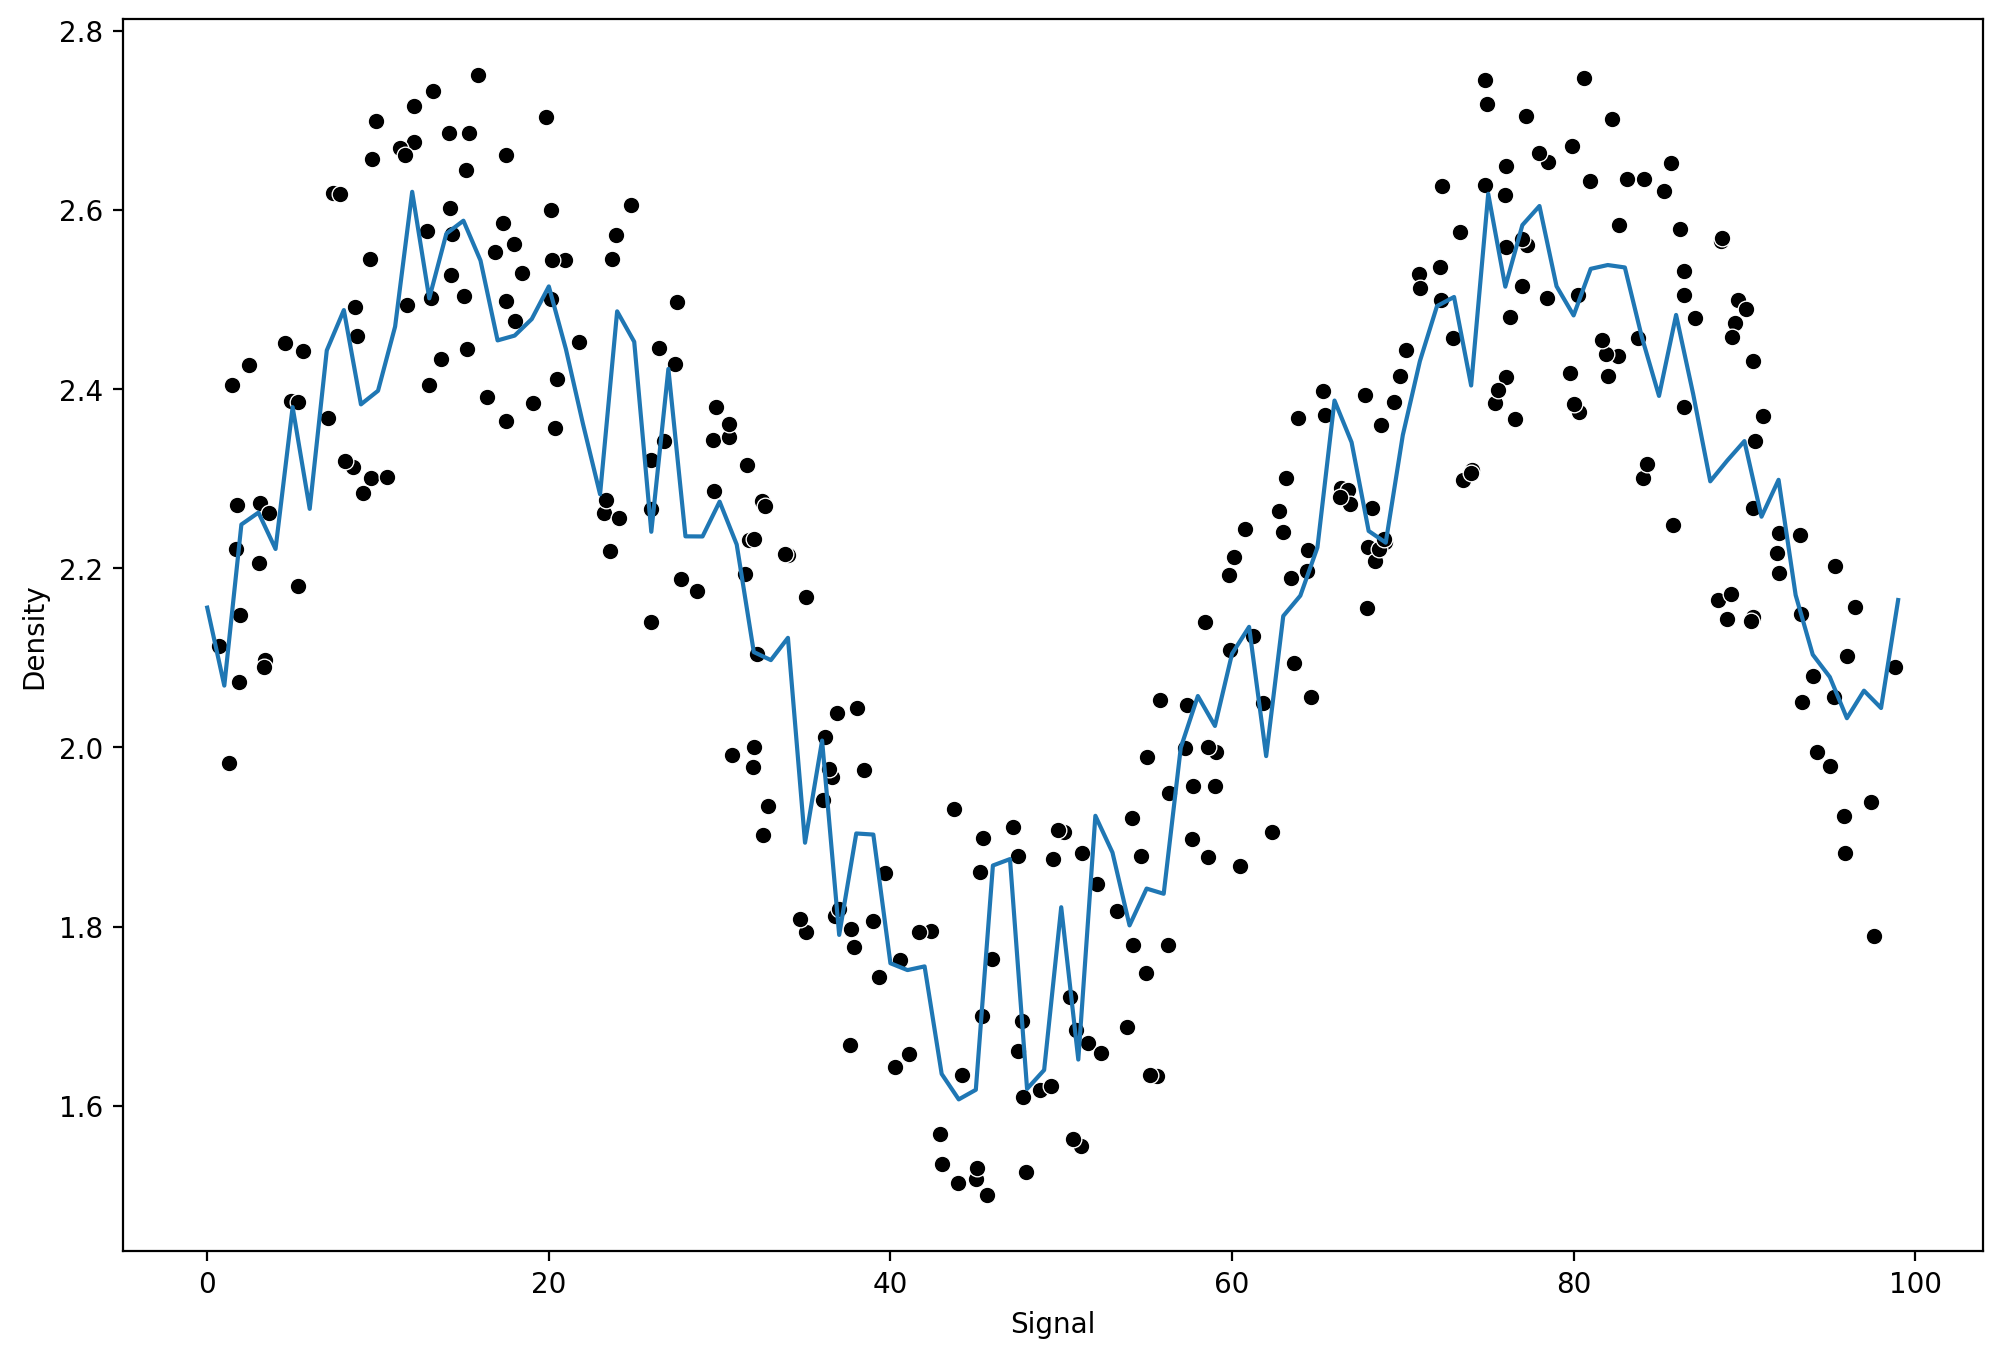

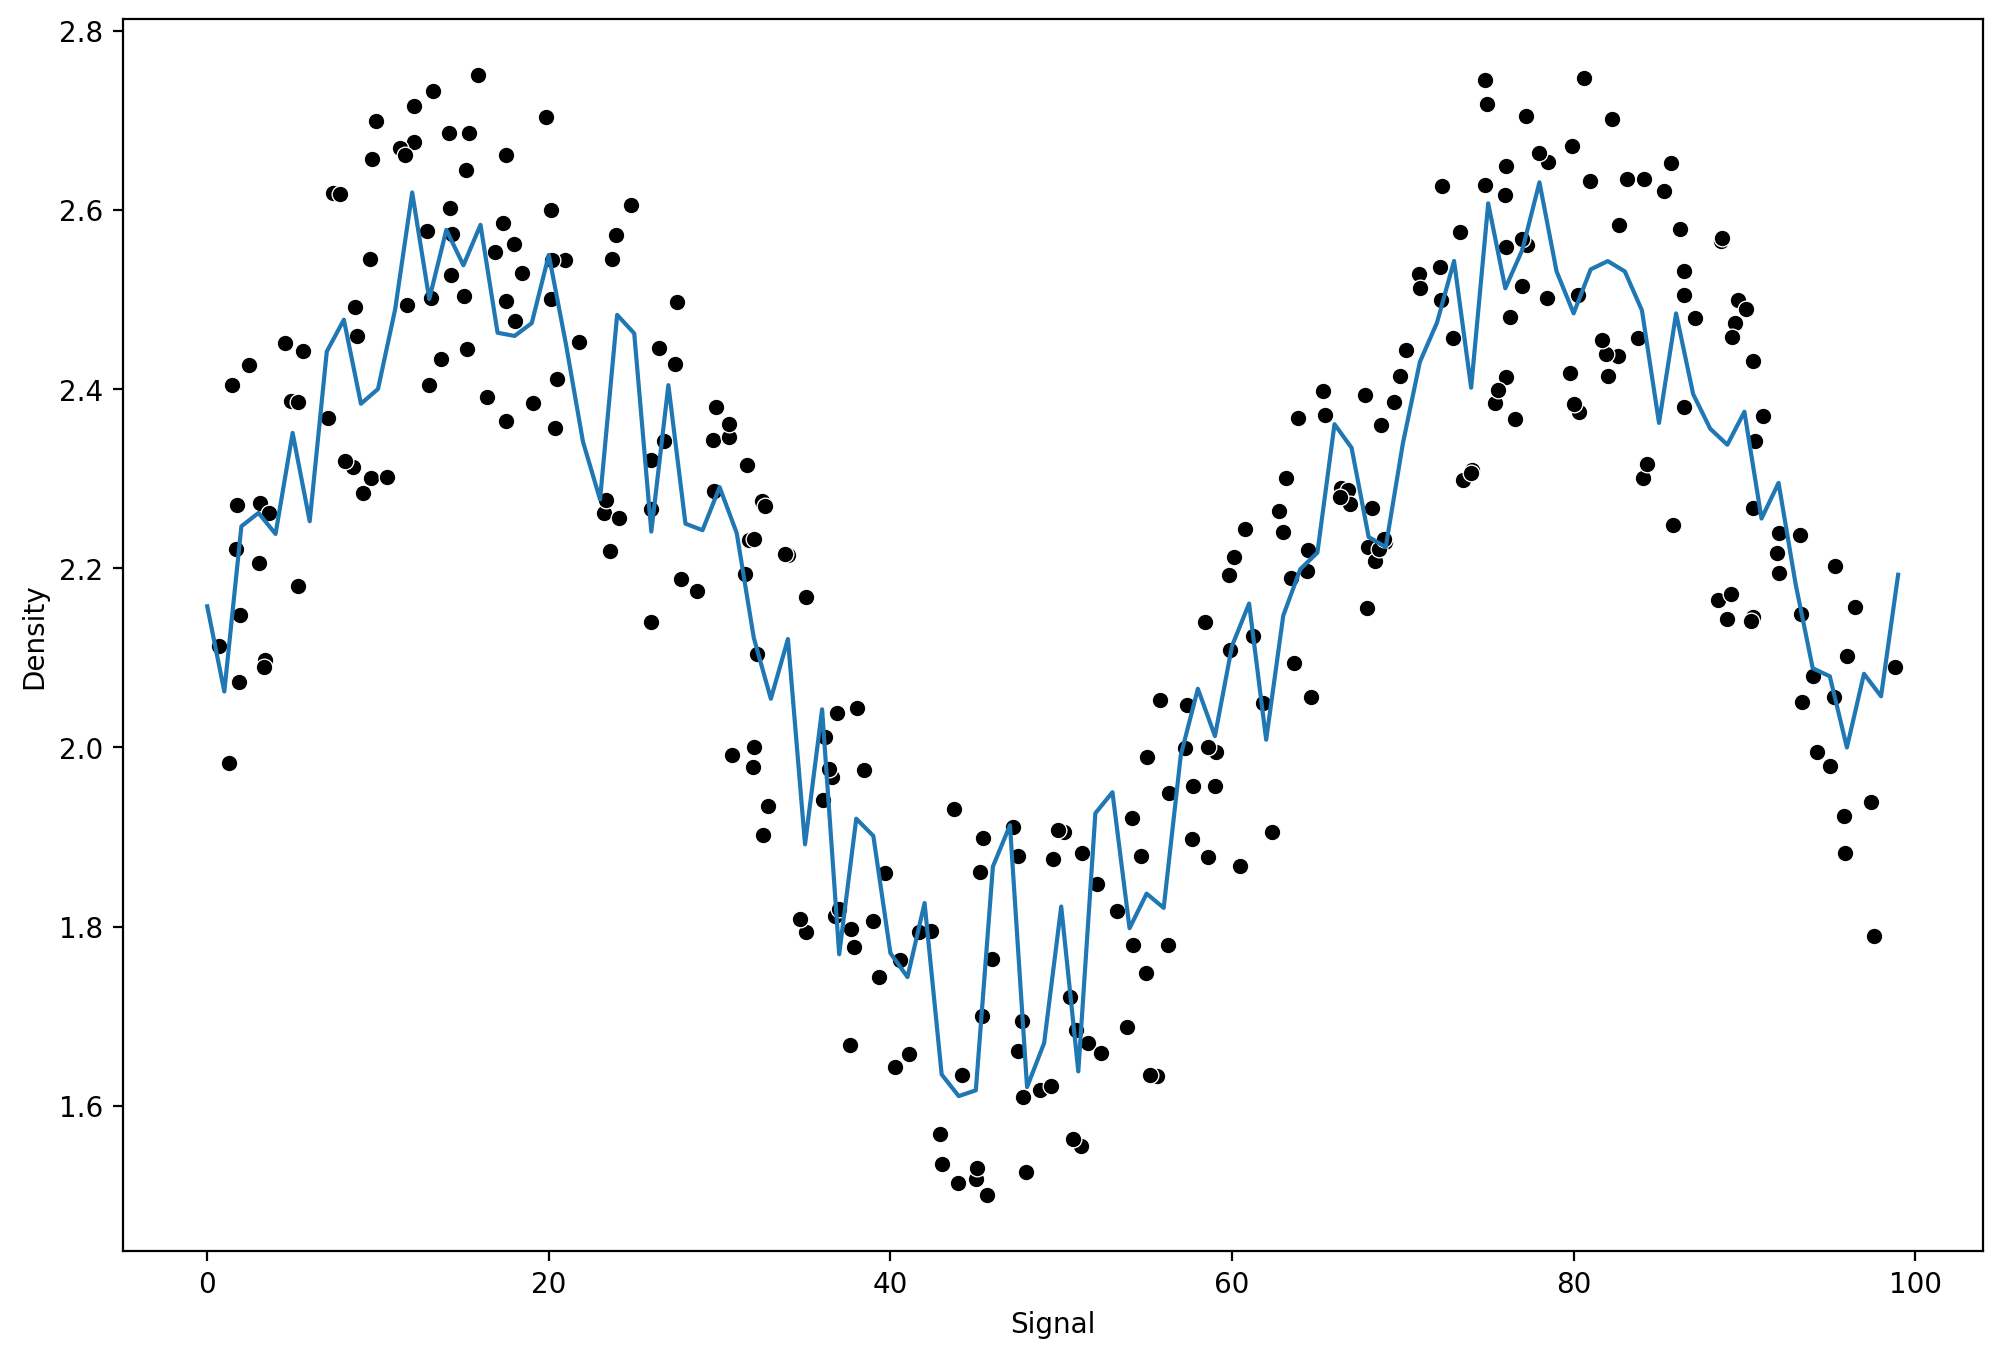

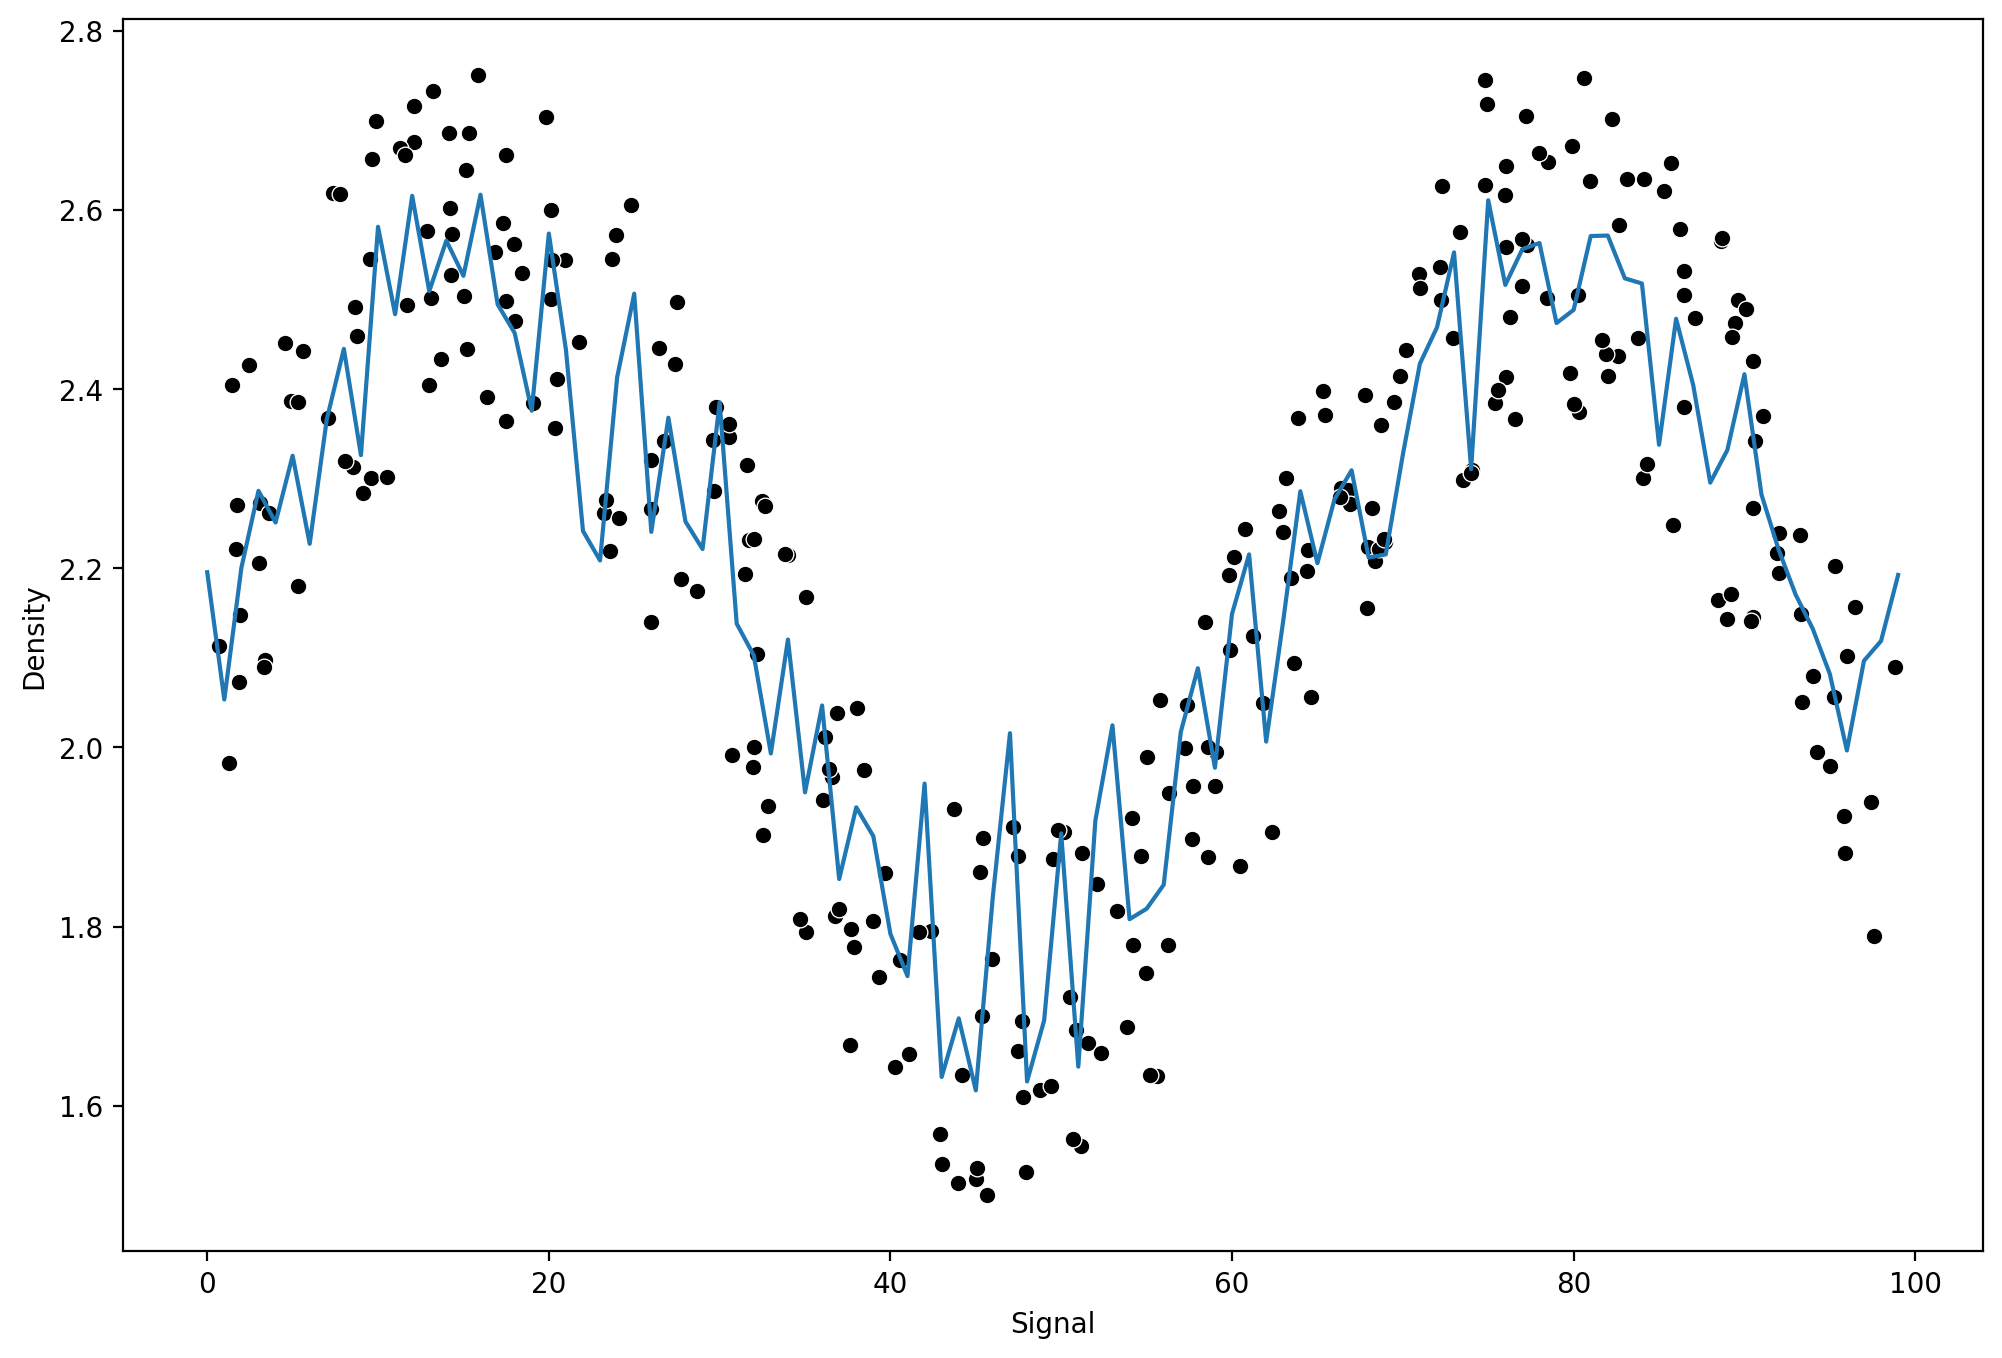

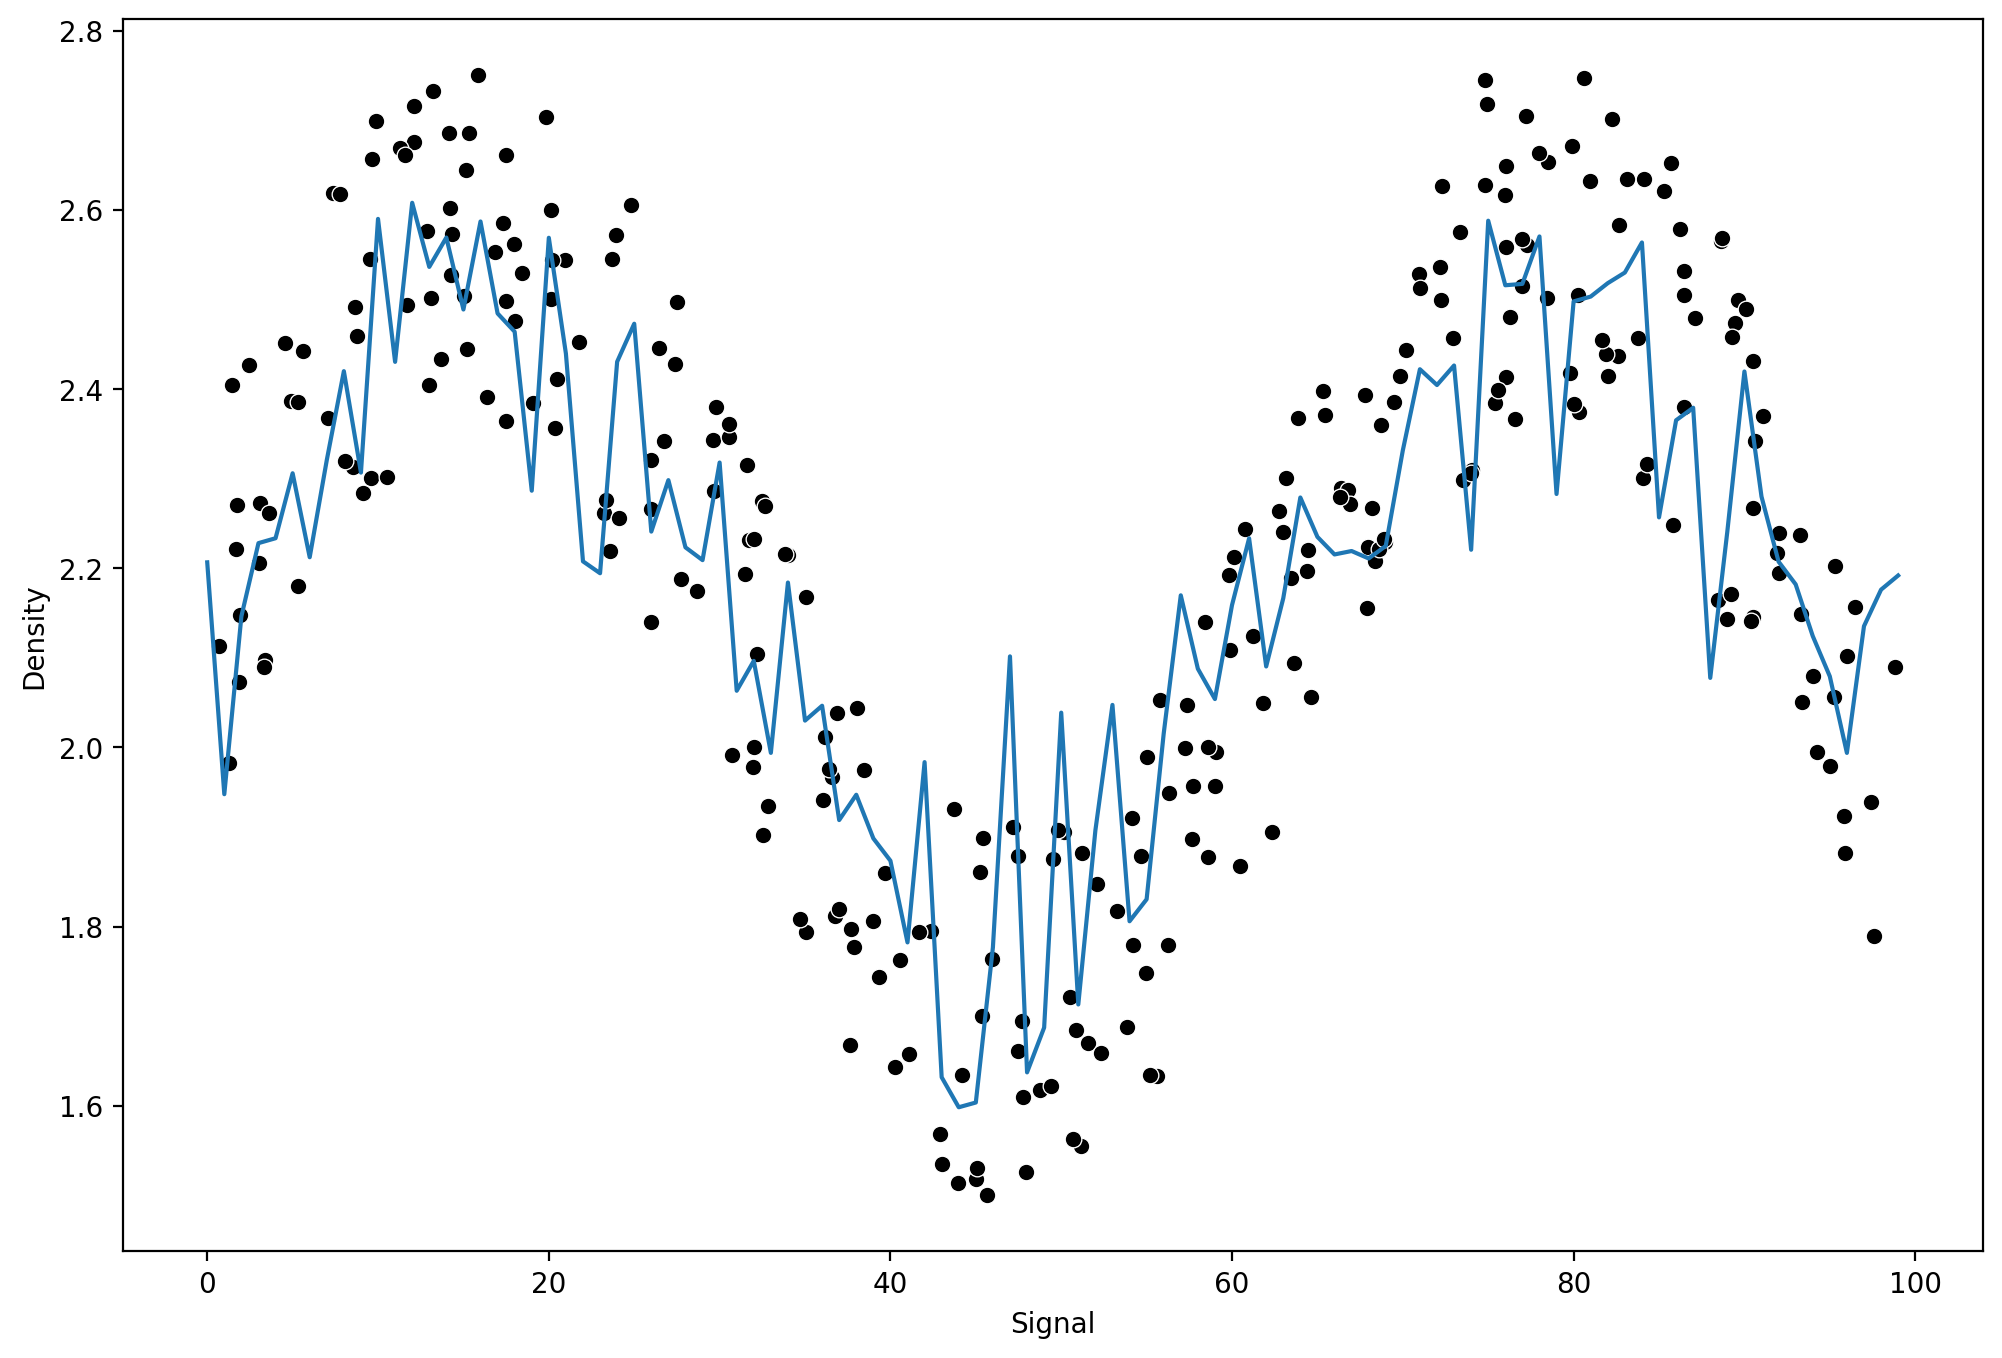

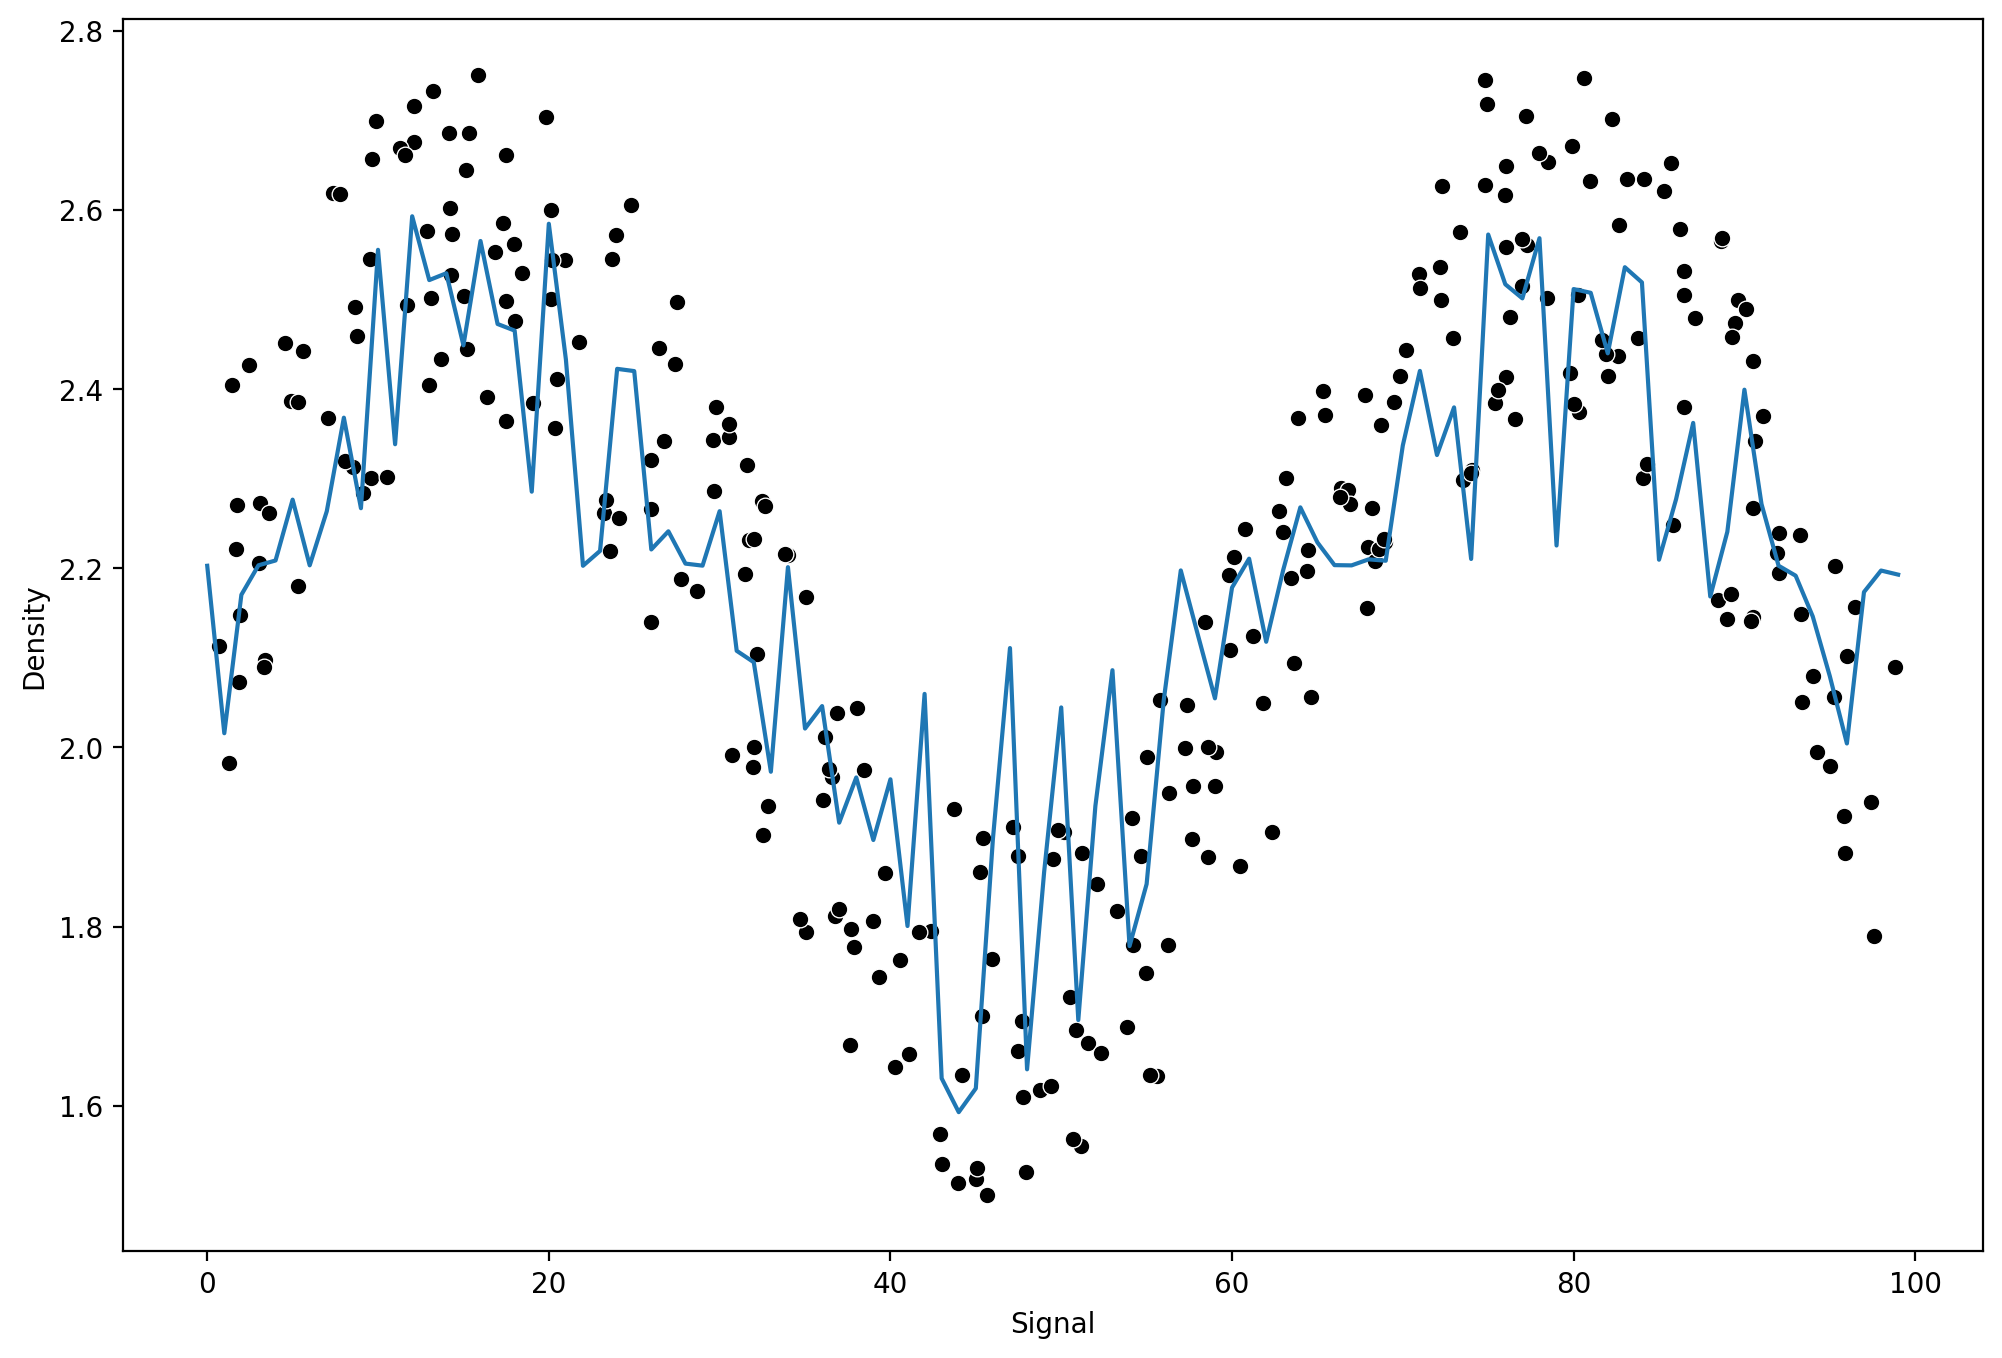

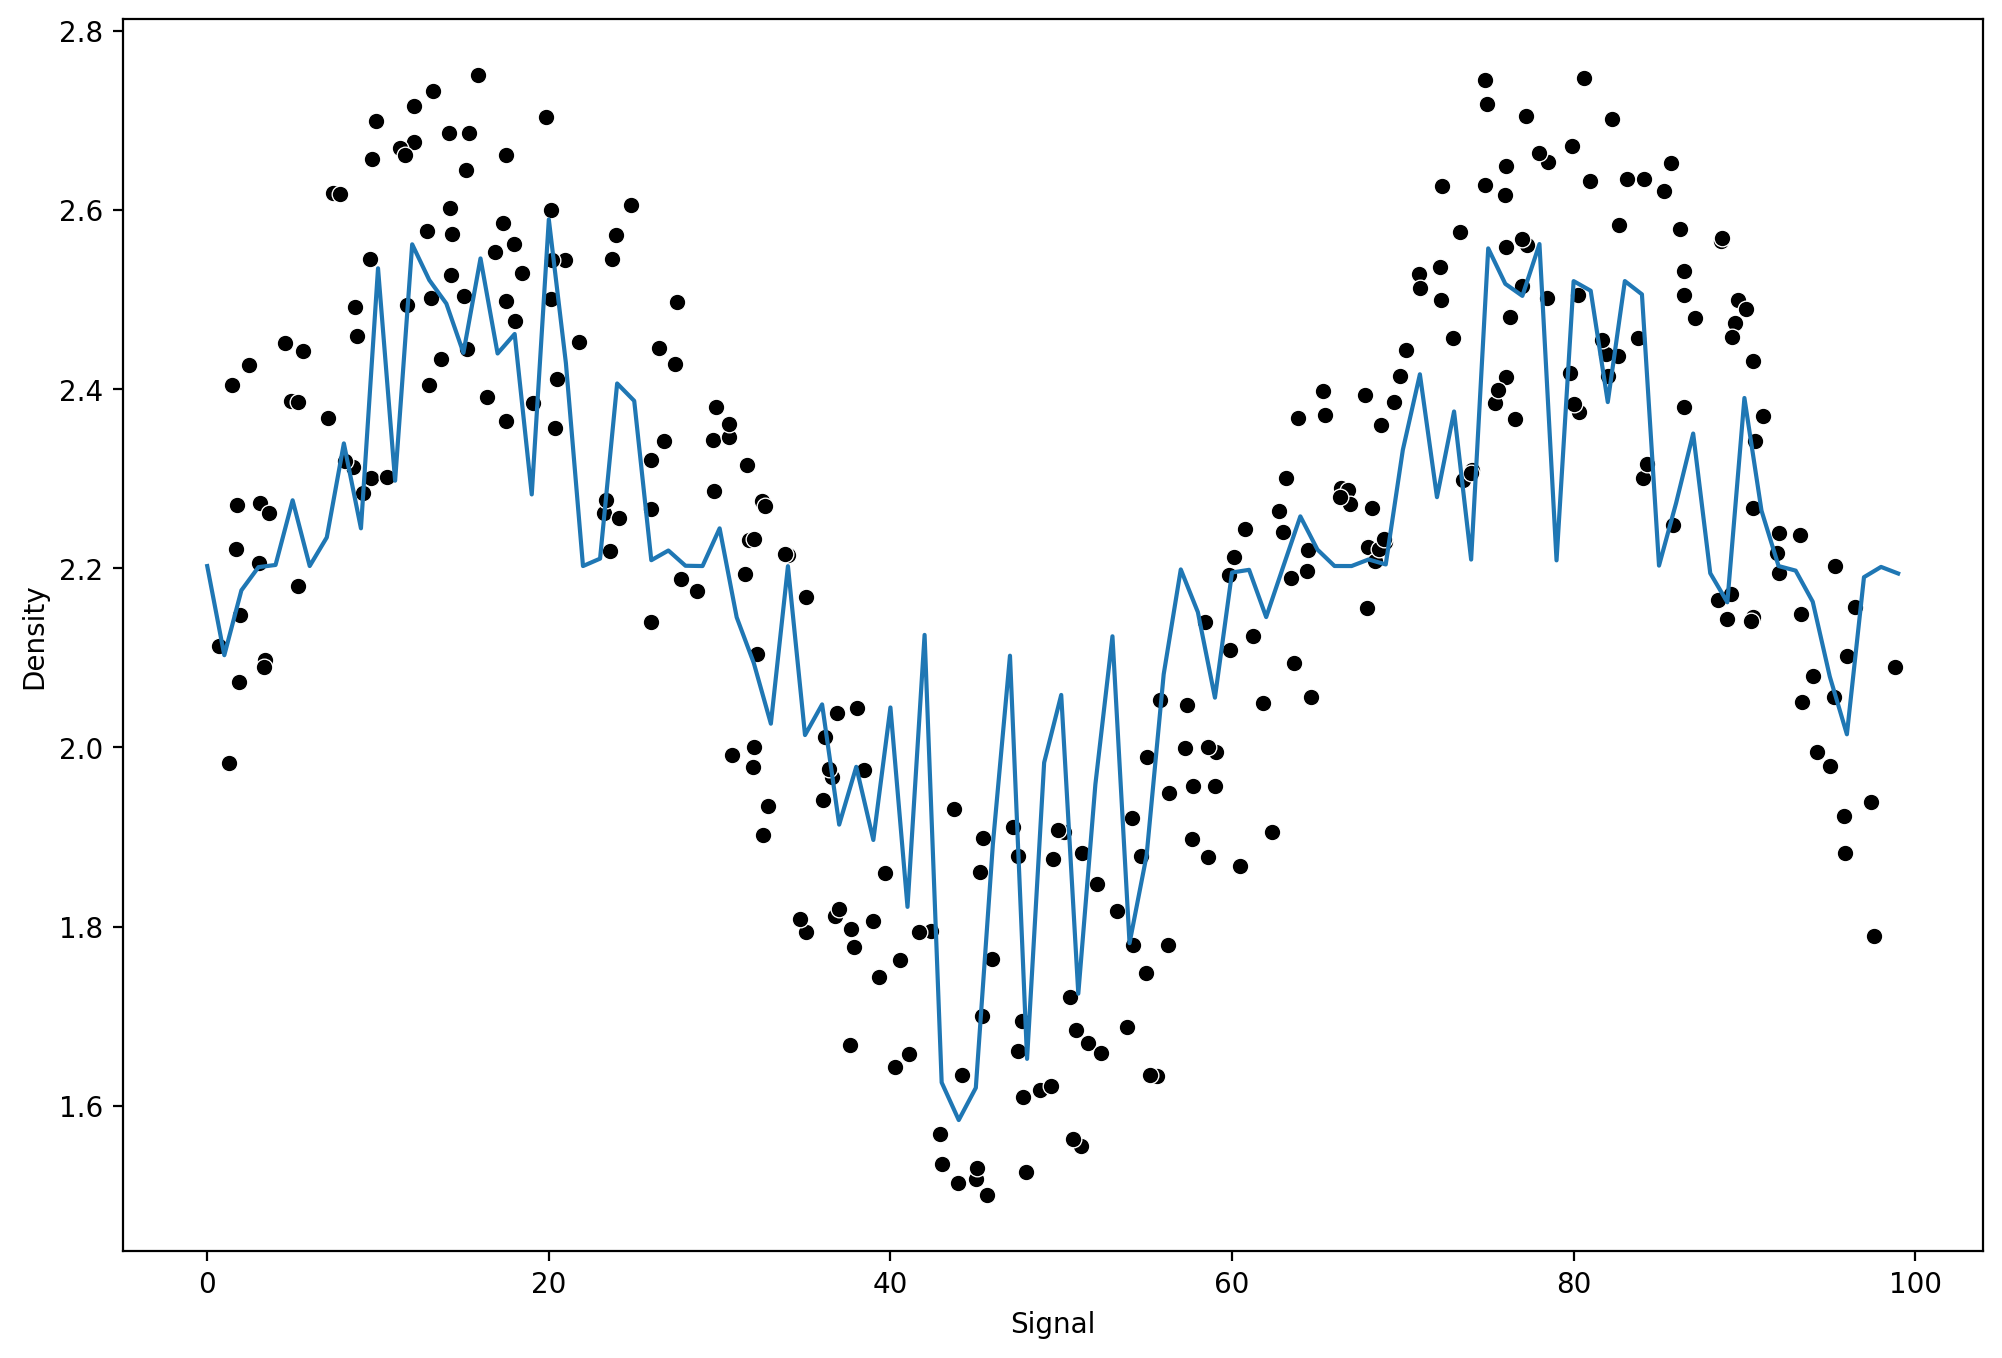

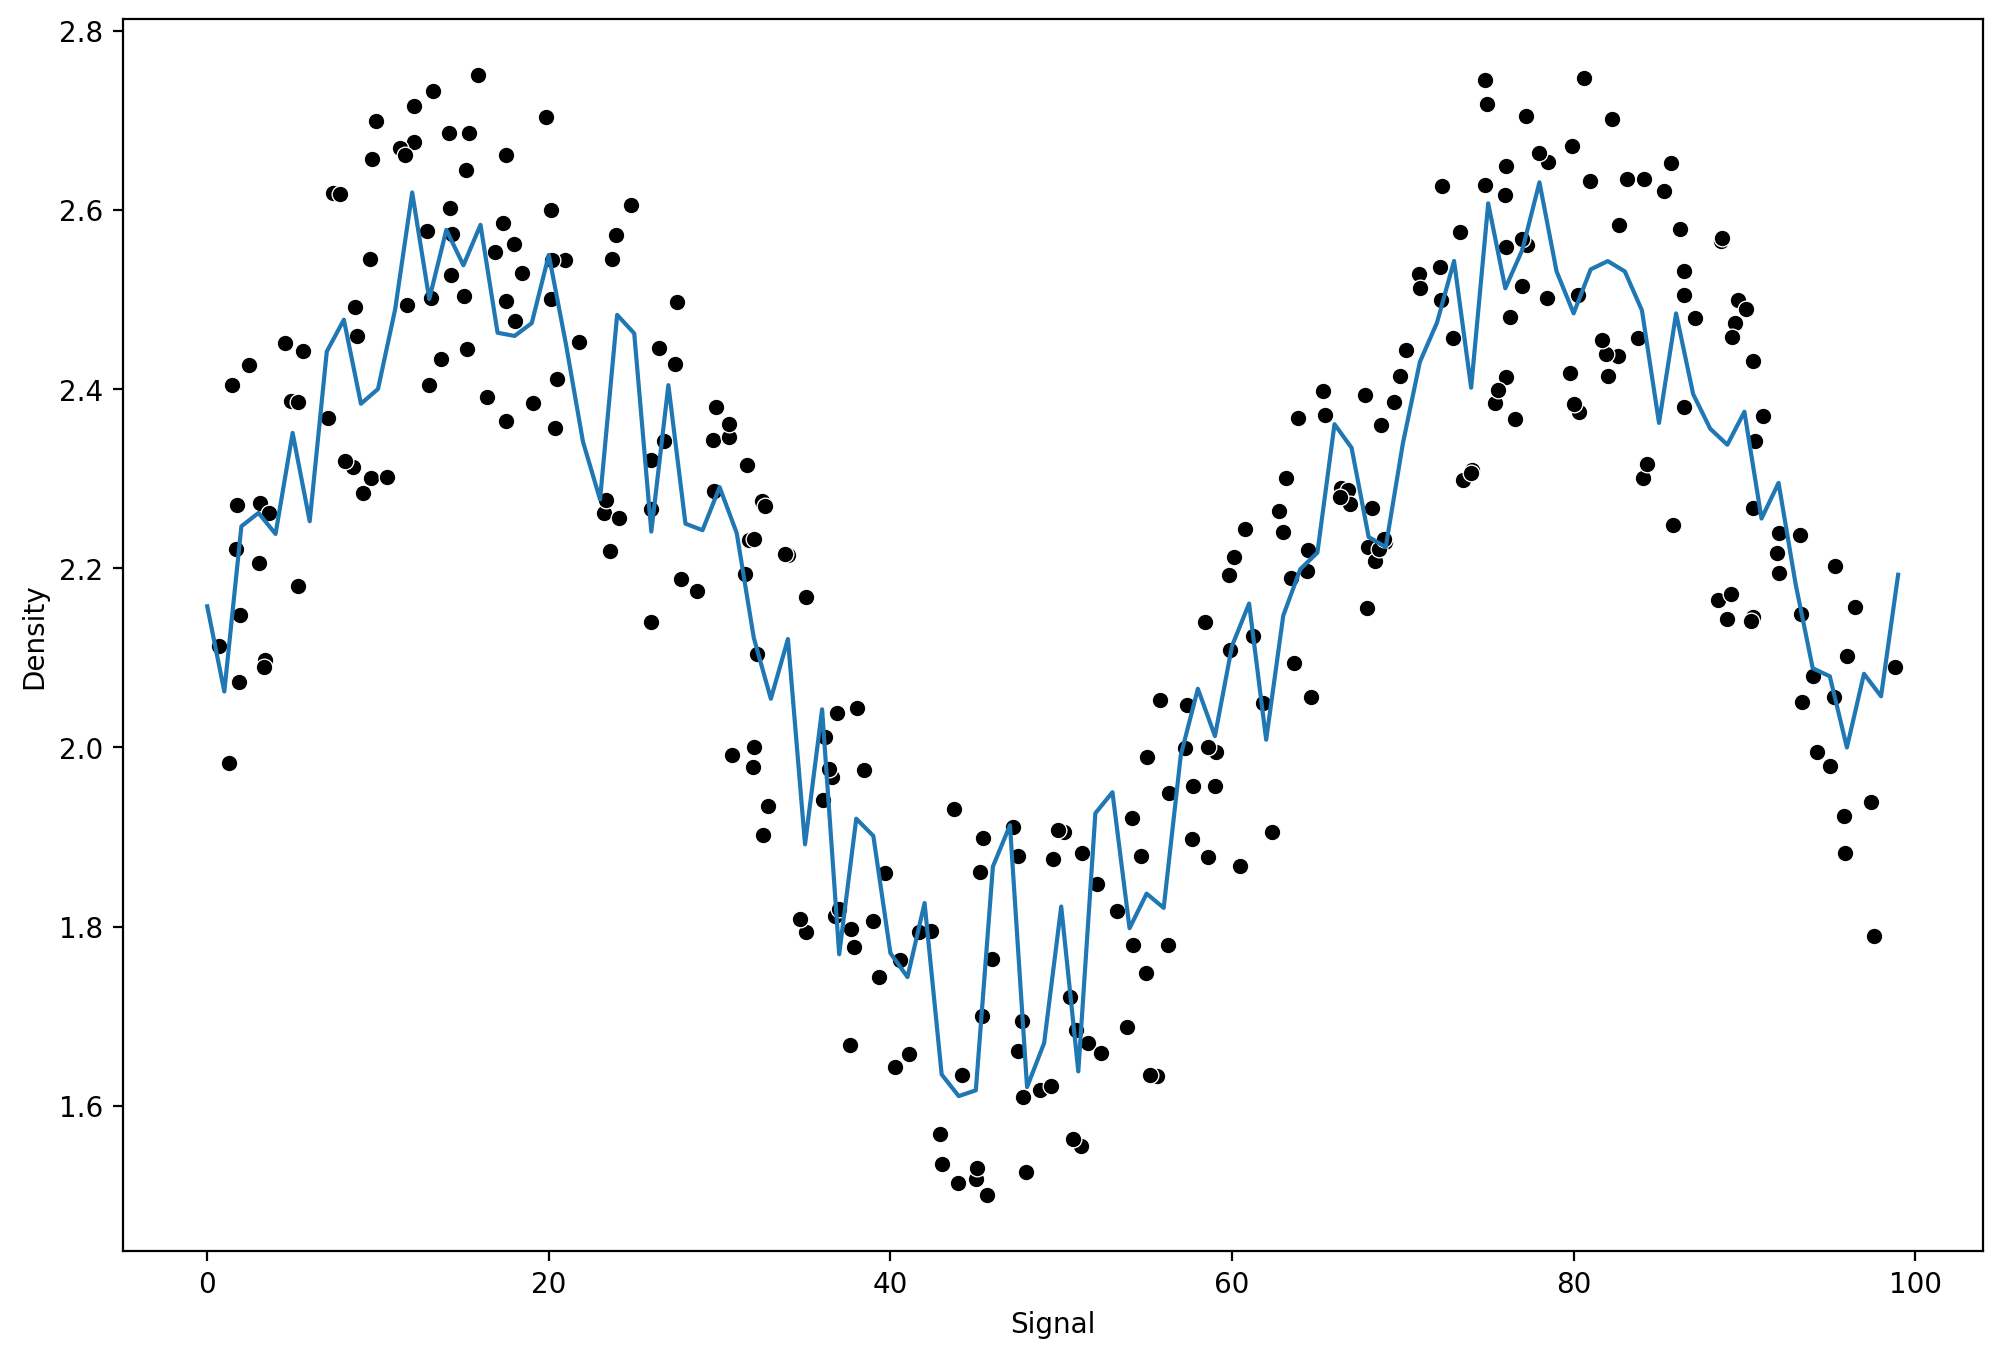

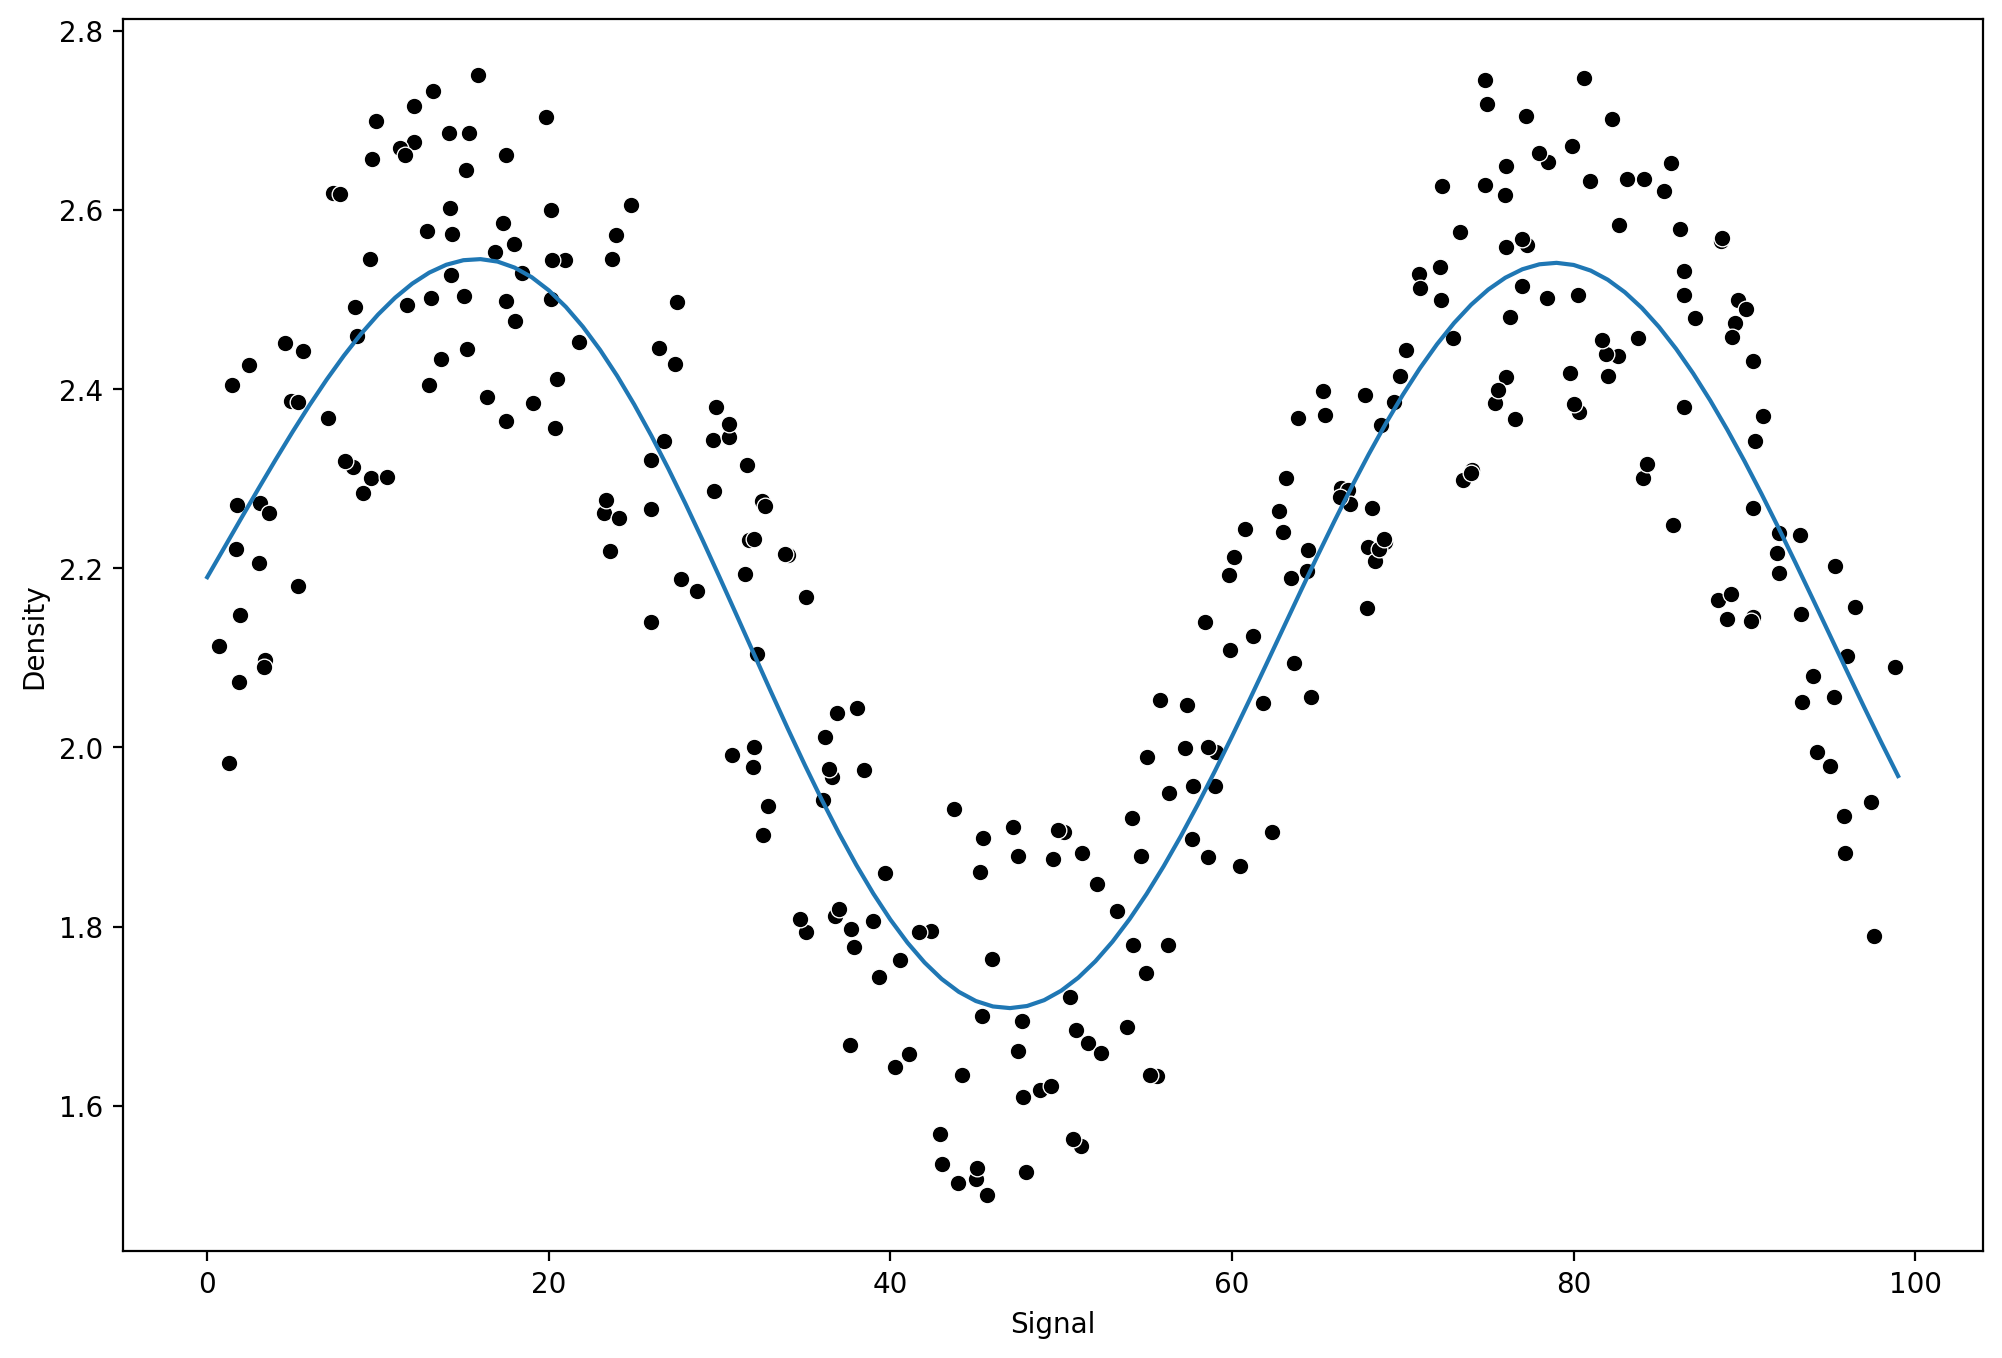

In [162]:
ga=[0.1,0.3,0.7,1,2,5,10,15,'auto','scale']

for n in ga:
    svr=SVR(gamma=n)
#     model=KNeighborsRegressor(n_neighbors=n)
    run_model(svr,X_train,y_train,X_test,y_test)

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
rfr=RandomForestRegressor(n_estimators=10)

MAE:0.11051698066427125
RMSE:0.12912109433735178


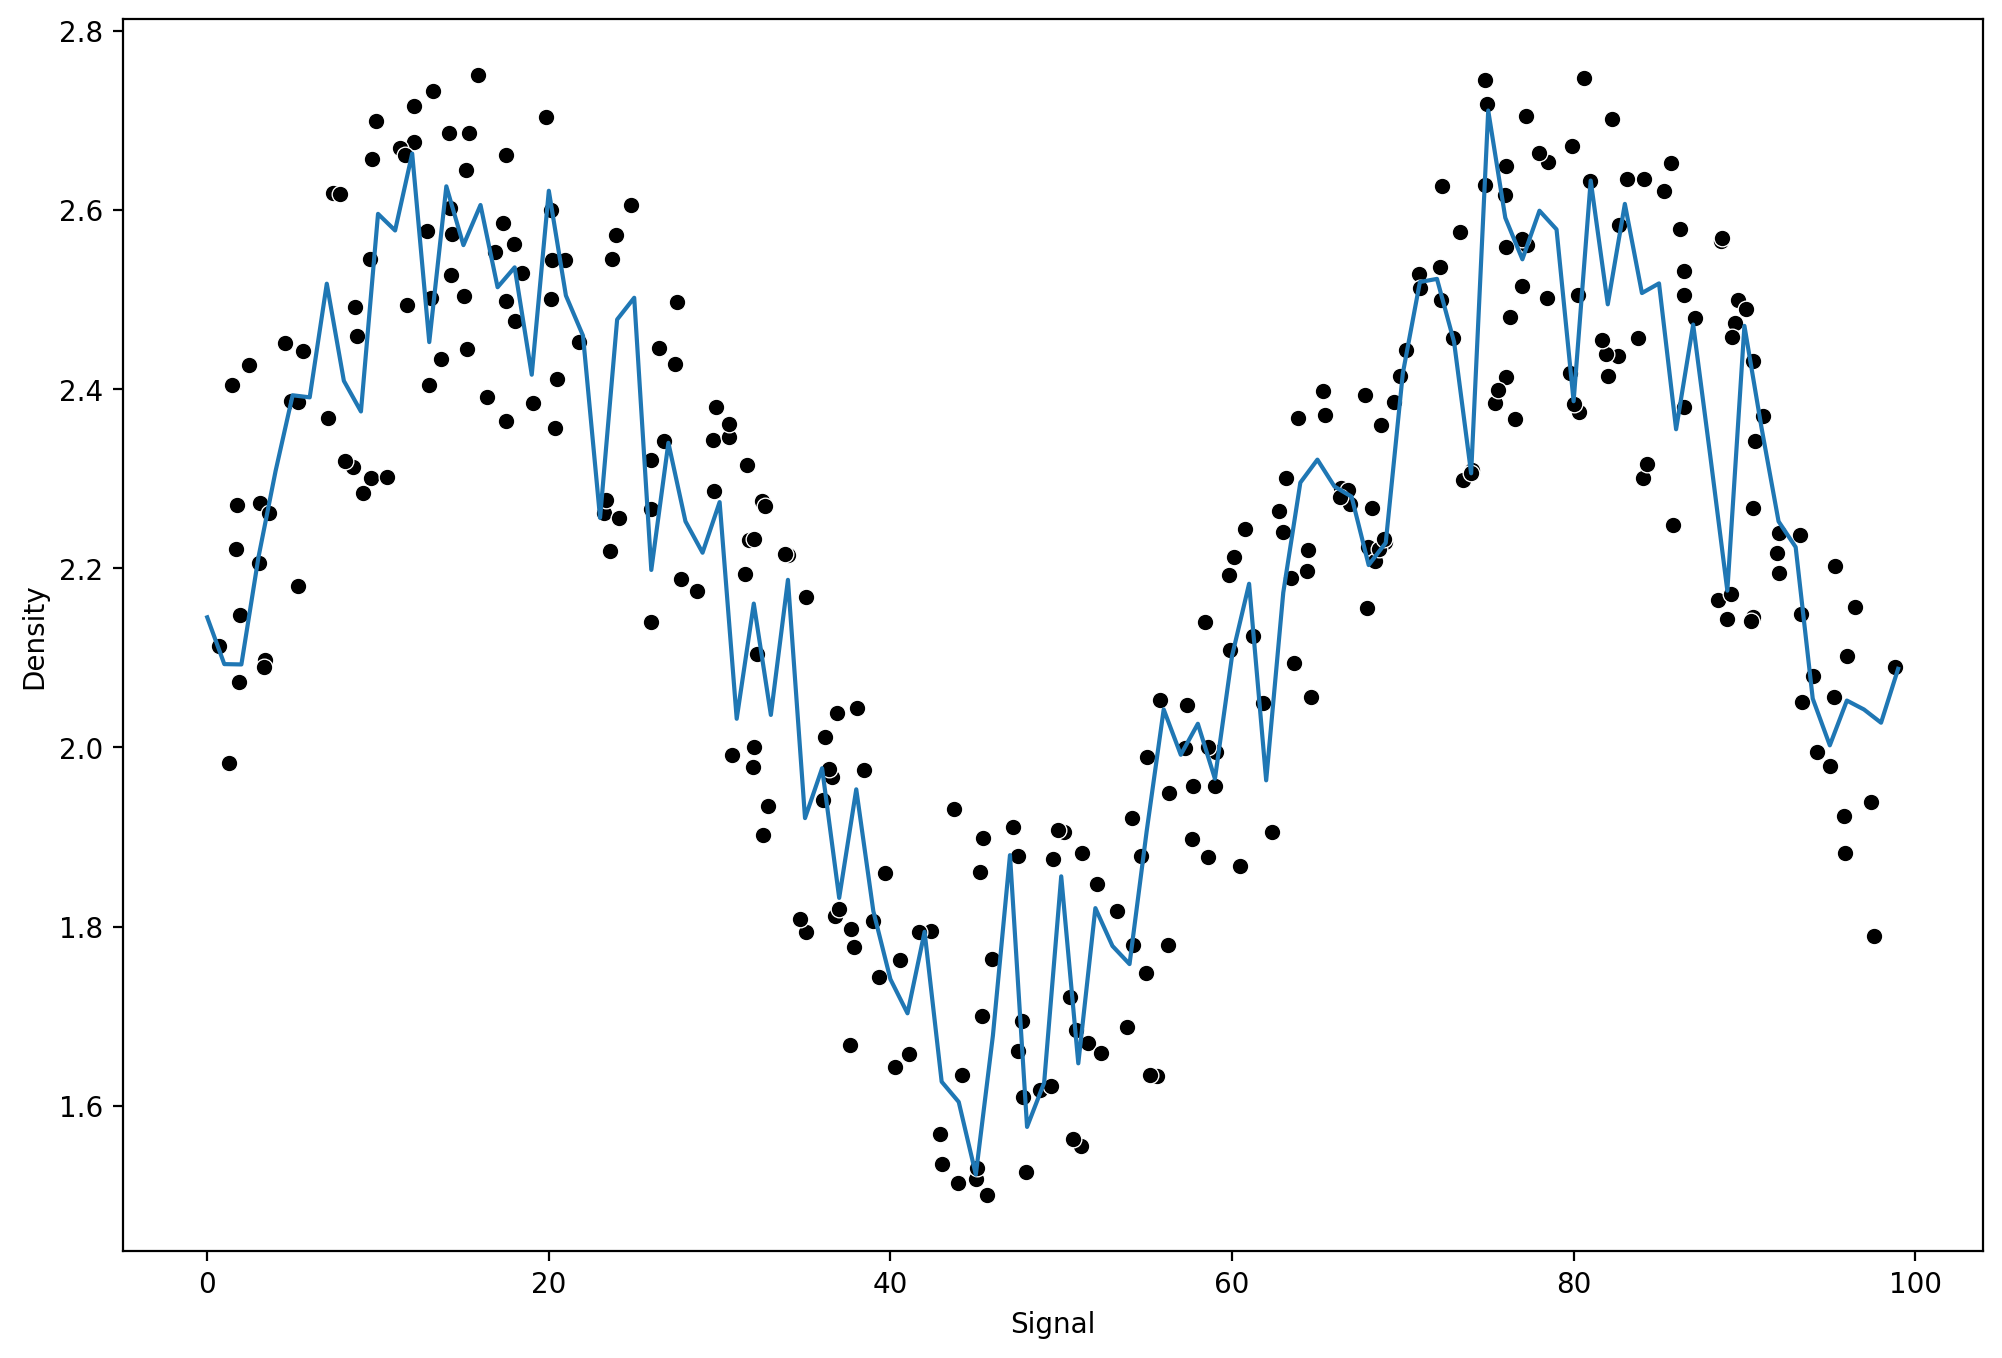

In [165]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [166]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE:0.11318284854800689
RMSE:0.13294148649584667


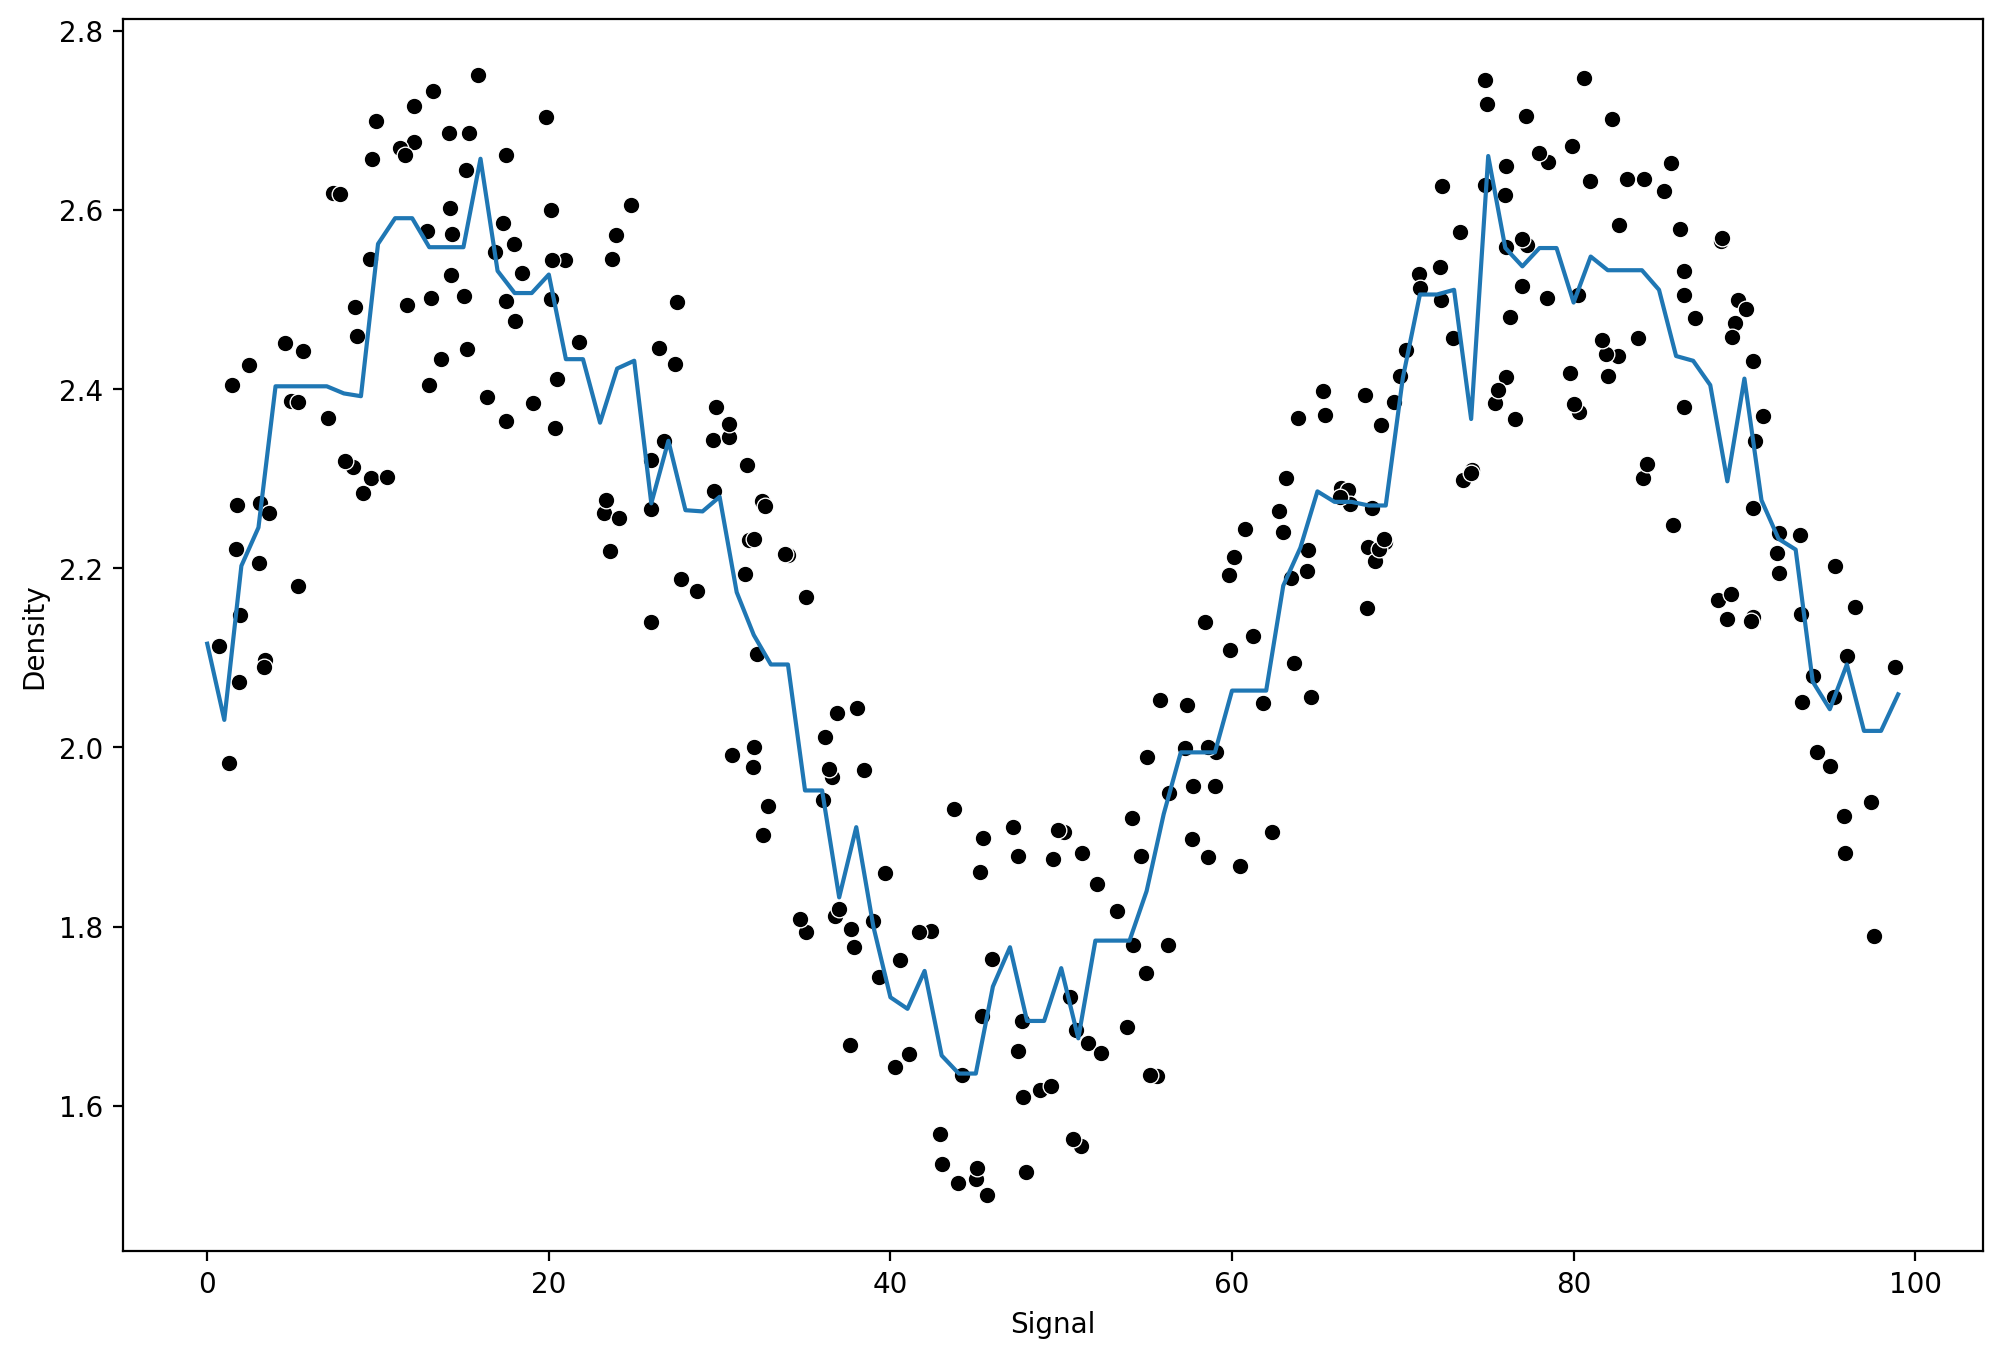

In [167]:
model=GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE:0.12033867347217675
RMSE:0.13792225580528975


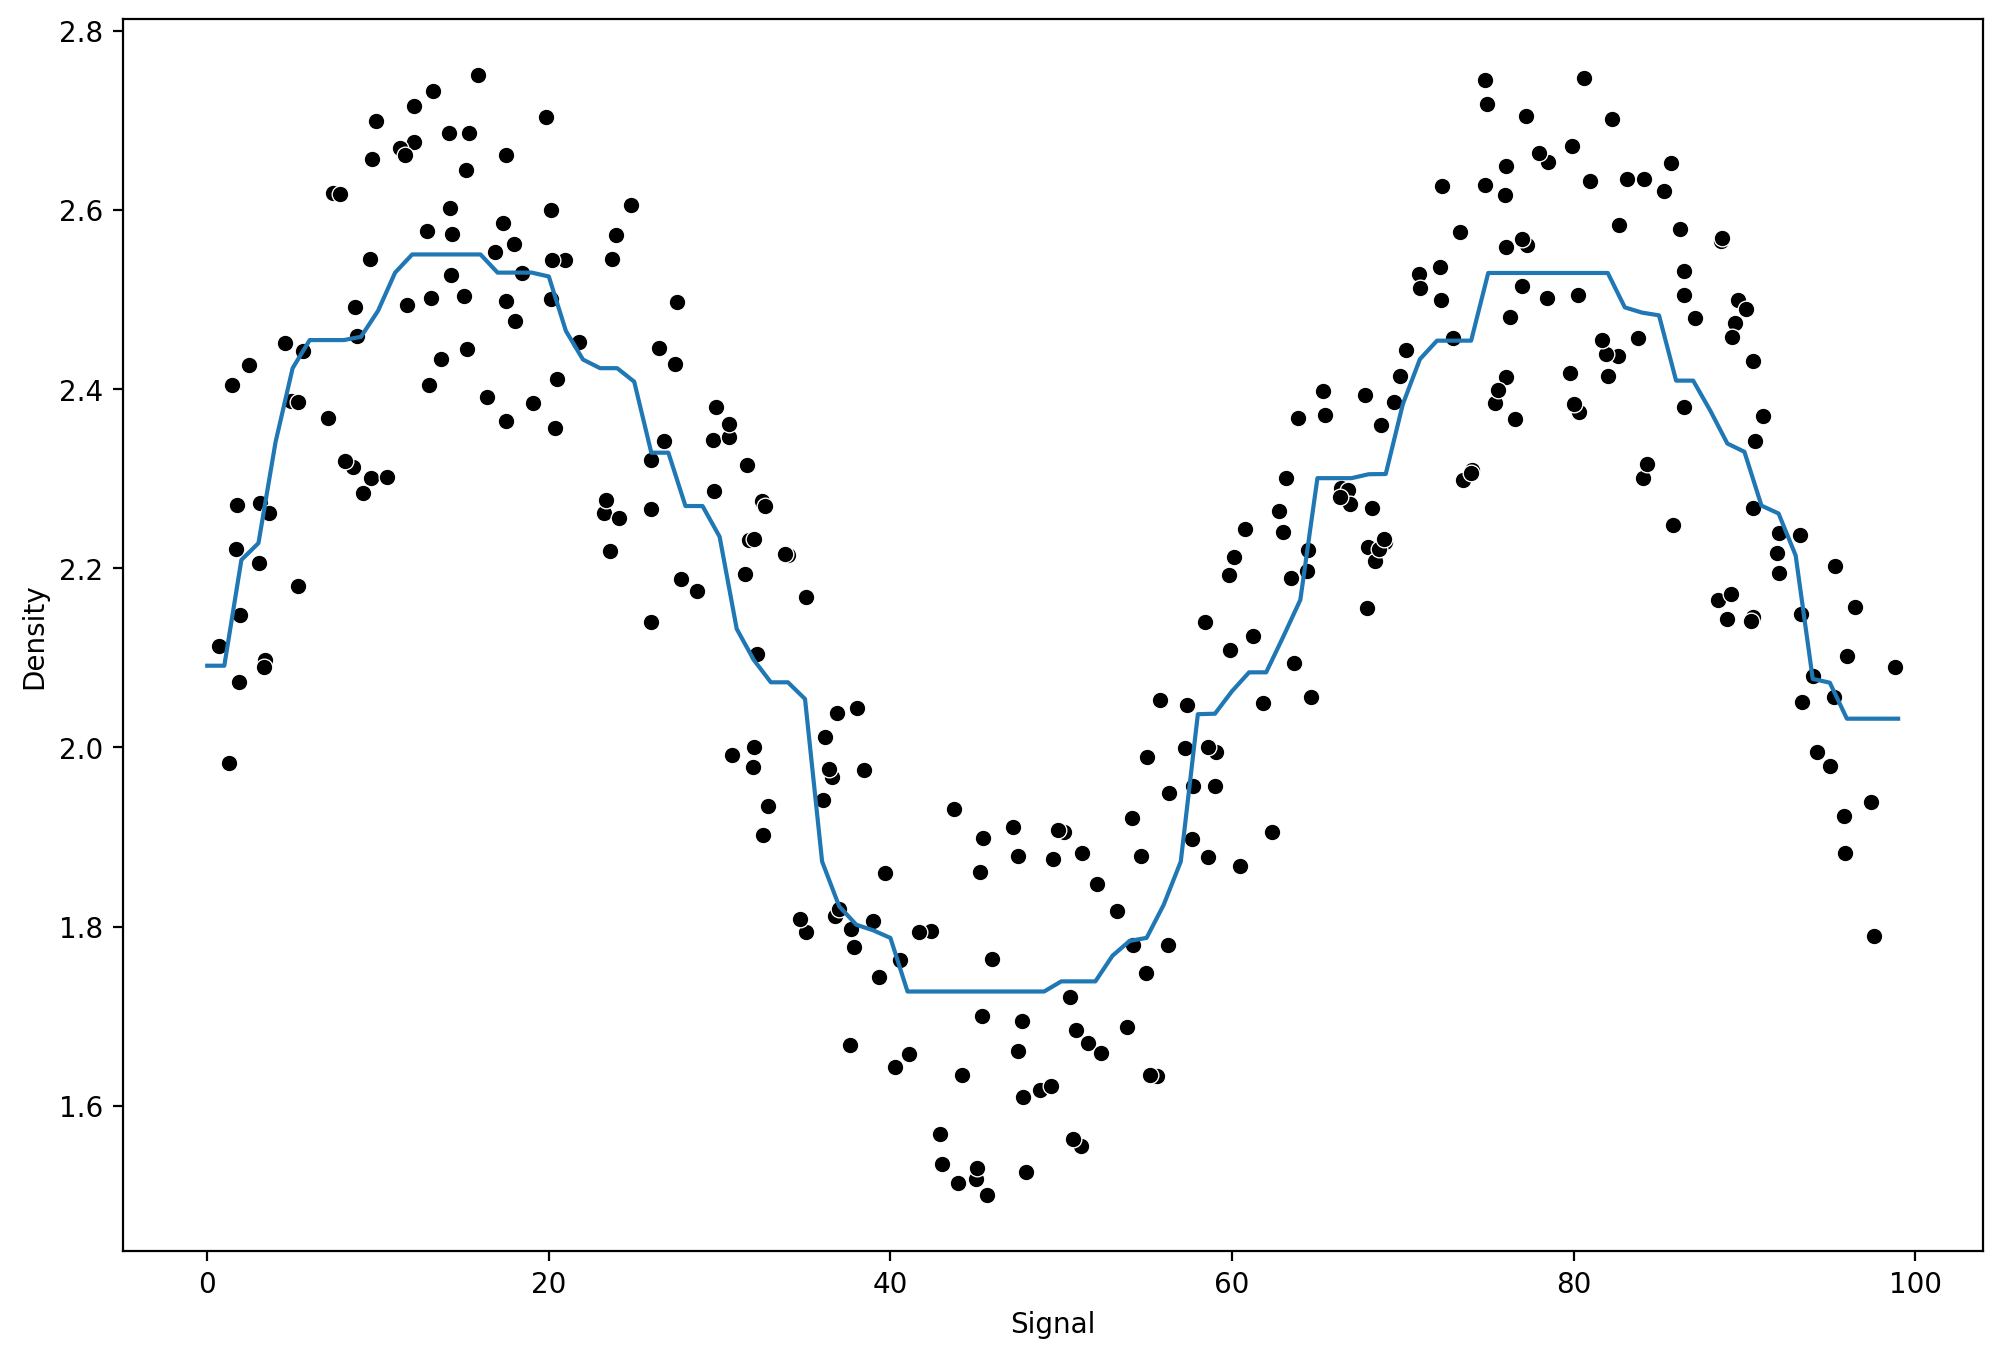

In [168]:
model=AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)